# Exercises Numerical Methods 2023/2024

::: {.callout-important}
### Important:
  
  * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
  * Only one document, that was tested on our [KOARCH Server](https://hub.0x3e8.de/hub/spawn), is allowed.
  * Presentation is based on this notebook. No additional slides are allowed!
  * Python version 3.11 and spotPython version `0.10.15` (or higher) is required, see, e.g., [https://pypi.org/project/spotPython/](https://pypi.org/project/spotPython/) or on [GitHub](https://github.com/sequential-parameter-optimization/spotPython.git).
  * Please incooperate the results from the exercises as well as your own, additional findings, into this notebook and submit the updated notebook.
  * Your own ideas and findings are welcome and will be rewarded.

::: 

## Exercises Chapter 08: Multi-dimensional Functions

* The following exercises refer to chapter 08 of the book, see [https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/008_num_spot_multidim.html](https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/008_num_spot_multidim.html).

### 1. The Three Dimensional `fun_cubed`

* The input dimension is `3`. The search range is  $-1 \leq x \leq 1$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?


Definition
The fun_cubed function represents a mathematical model that calculates the cube of its input. This type of function is often used in mathematical modeling and optimization problems to introduce non-linearity.

Mathematical Representation
The fun_cubed function can be expressed mathematically as:

𝑓
(
𝑥
)
=
𝑥
3

 

where:

𝑥 is the input variable.
𝑥
3
  is the cube of 
𝑥
Characteristics
Univariate: This function takes a single input variable.
Non-linear: The relationship between the input and output is non-linear due to the cubic term.
Smooth and Continuous: The function is smooth and continuous over all real numbers.
Symmetric: The function is symmetric with respect to the origin, meaning 
𝑓
(
−
𝑥
)
=
−
𝑓
(
𝑥
)
.
Monotonic: The function is strictly increasing for positive values of 

x and strictly decreasing for negative values of 
𝑥


[rank: 0] Seed set to 123
[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/03_c02-b01_2024-05-19_22-52-41 for SummaryWriter()
spotPython tuning: -1.4616821761042098 [#######---] 73.33% 
spotPython tuning: -1.4616821761042098 [########--] 80.00% 
spotPython tuning: -2.0535960676161324 [#########-] 86.67% 
spotPython tuning: -2.0535960676161324 [#########-] 93.33% 
spotPython tuning: -2.0535960676161324 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '03',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 15,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 15,
 'fun_repeats': 1,
 'horizon': None,
 'infill_c

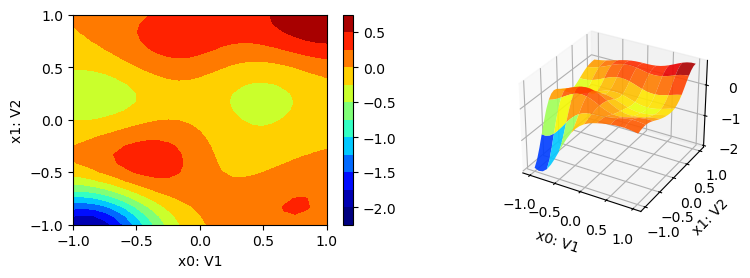

V1:  57.59810950258364
V2:  100.0
V3:  5.090658059392613


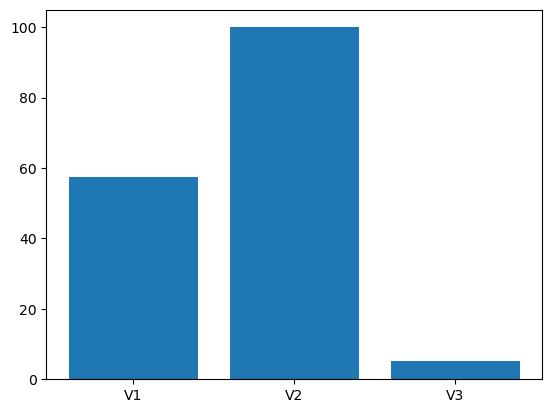

In [1]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot
import matplotlib.pyplot as plt

# Define the function
fun = analytical().fun_cubed
# Define variables as input to the function
fun_control = fun_control_init(
              PREFIX="03",
              lower = -1.0*np.ones(3),
              upper = 1.0*np.ones(3),
              var_name=["V1", "V2", "V3" ],
              show_progress=True)
#Define a surrogate
surrogate_control = surrogate_control_init(n_theta=3)
#Give input to SPOT
spot_3 = spot.Spot(fun=fun,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
#Run Spot
spot_3.run()
_ = spot_3.print_results()
spot_3.plot_contour(i=0, j=1)
spot_3.plot_contour(i=0, j=2)
spot_3.plot_contour(i=1, j=2)

_ = spot_3.print_importance()
spot_3.plot_importance()

### 2. The Ten Dimensional `fun_wing_wt`

* The input dimension is `10`. The search range is  $0 \leq x \leq 1$ for all dimensions.
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?
  * Generate contour plots for the three most important variables. Do they confirm your selection?
  
  
Definition
The fun_wing_wt function represents a mathematical model used to estimate the weight of an aircraft wing. This type of function is often used in aerospace engineering for design and optimization purposes.

Mathematical Representation
The wing weight function typically has multiple input variables that correspond to different design parameters of the wing. A commonly used model is:

𝑊
wing
=
0.036
×
𝑆
𝑤
0.758
×
𝑊
fw
0.0035
×
(
𝐴
cos
⁡
2
(
Λ
)
)
0.6
×
𝑞
0.006
×
𝜆
0.04
×
(
100
×
𝑡
/
𝑐
cos
⁡
(
Λ
)
)
−
0.3
×
(
𝑁
𝑧
×
𝑊
dg
)
0.49
+
𝑆
𝑤
×
𝑊
𝑝
W 

where:

𝑆
𝑤

​
 : Wing area

W 
fw
​
 : Weight of fuel in the wing

A: Aspect ratio

Λ: Quarter-chord sweep angle (in degrees)

q: Dynamic pressure at cruise
𝜆: Taper ratio
𝑡
/
𝑐
: Thickness-to-chord ratio
𝑁
𝑧
​
 : Ultimate load factor
𝑊
dg
​
 : Flight design gross weight
𝑊
𝑝

​
 : Paint weight per unit area
Characteristics
Multivariable: This function has multiple input parameters, each representing a physical characteristic or design parameter of the wing.
Non-linear: The relationship between the inputs and the wing weight is non-linear, as evidenced by the exponents and trigonometric functions.
Dimensional Analysis: The function involves dimensional quantities like area, weight, pressure, and angle.
Optimization: It is often used in optimization problems to minimize or constrain the weight of the wing while satisfying design requirements.

[rank: 0] Seed set to 123
[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/10_c02-b03_2024-05-20_18-37-55 for SummaryWriter()
spotPython tuning: 130.98167265774384 [#######---] 73.33% 
spotPython tuning: 124.96150746789587 [########--] 80.00% 
spotPython tuning: 123.38367978743302 [#########-] 86.67% 
spotPython tuning: 123.38367978743302 [#########-] 93.33% 
spotPython tuning: 123.38367978743302 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '10',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 15,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 15,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criter

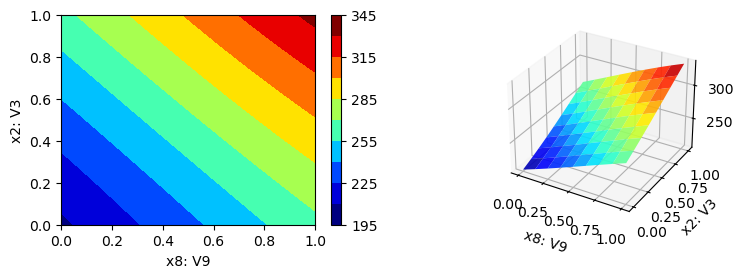

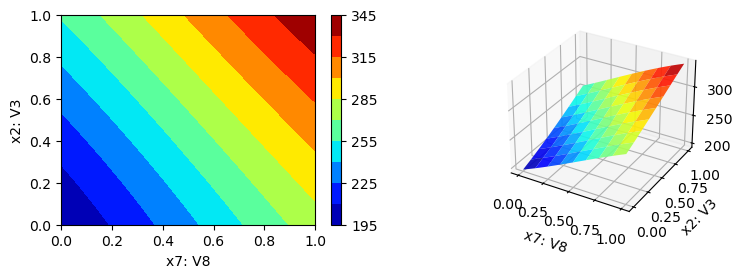

V1:  33.21379512913731
V2:  0.5377341606911471
V3:  59.25092727660866
V4:  12.628480950437131
V4:  0.5377341606911471
V6:  0.5377341606911471
V7:  41.221496564998425
V8:  100.0
V9:  66.7691019669039
V10:  29.46506485851672


In [1]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot
import matplotlib.pyplot as plt

# Define the function
fun = analytical().fun_wingwt
# Define variables as input to the function
fun_control = fun_control_init(
              PREFIX="10",
              lower = 0*np.ones(10),
              upper = 1.0*np.ones(10),
              var_name=["V1", "V2", "V3", "V4", "V4", "V6", "V7", "V8", "V9", "V10" ],
              show_progress=True)
#Define a surrogate
surrogate_control = surrogate_control_init(n_theta=10)
#Give input to SPOT
spot_10 = spot.Spot(fun=fun,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
#Run Spot
spot_10.run()
_ = spot_10.print_results()
spot_10.plot_contour(i=7, j=8)
spot_10.plot_contour(i=8, j=2)
spot_10.plot_contour(i=7, j=2)

_ = spot_10.print_importance()
spot_10.plot_importance()

### 3. The Three Dimensional `fun_runge`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?
    
    
The fun_runge is typically a reference to the Runge function, which is a well-known example in numerical analysis and approximation theory. The Runge function is often used to demonstrate the phenomenon known as Runge's phenomenon, which illustrates the problems of using high-degree polynomials for interpolation on equispaced nodes.

Definition
The Runge function is defined as:
𝑓
(
𝑥
)
=
1/(1+25x^2)
​
 

Characteristics
Shape: The function has a peak at 
𝑥
=
0
x=0 and tails off to zero as 
𝑥
x moves away from zero.
Domain: It is often considered on the interval 
[
−
1
,
1
]
[−1,1].
Interpolation Challenge: When trying to interpolate this function using polynomials at equally spaced points, the interpolant can oscillate wildly, particularly near the endpoints of the interval. This issue becomes more pronounced with higher-degree polynomials.


[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/10_c02-b01_2024-05-19_22-53-28 for SummaryWriter()
spotPython tuning: 0.014160612902528853 [#######---] 73.33% 
spotPython tuning: 0.014160612902528853 [########--] 80.00% 
spotPython tuning: 0.013157894736842105 [#########-] 86.67% 
spotPython tuning: 0.013157894736842105 [#########-] 93.33% 
spotPython tuning: 0.013157894736842105 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '10',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 15,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 15,
 'fun_repeats': 1,
 'horizon': None,
 'inf

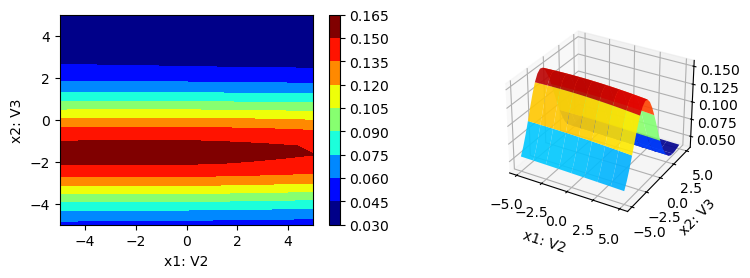

V1:  91.5762576715541
V2:  0.948973610527599
V3:  99.99999999999999


In [3]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot
import matplotlib.pyplot as plt

# Define the function
fun = analytical().fun_runge
# Define variables as input to the function
fun_control = fun_control_init(
              PREFIX="10",
              lower = -5.0*np.ones(3),
              upper = 5.0*np.ones(3),
              var_name=["V1", "V2", "V3"],
              show_progress=True)
#Define a surrogate
surrogate_control = surrogate_control_init(n_theta=3)
#Give input to SPOT
spot_3 = spot.Spot(fun=fun,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
#Run Spot
spot_3.run()
_ = spot_3.print_results()
spot_3.plot_contour(i=0, j=1)
spot_3.plot_contour(i=1, j=2)
spot_3.plot_contour(i=0, j=2)

_ = spot_3.print_importance()
spot_3.plot_importance()

### 4. The Three Dimensional `fun_linear`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?
    
Definition
A linear function is one of the simplest types of functions and is defined by the general form:
𝑓
(
𝑥
)
=
𝑚
𝑥
+
𝑏

where 

m is the slope and 

b is the y-intercept.

For a specific example, we might define a linear function as:
𝑓
(
𝑥
)
=
2
𝑥
+
3

where the slope 

m is 2, and the y-intercept 

b is 3.

Characteristics
Shape: The function produces a straight line when graphed.
Slope (
𝑚
m): Determines the steepness of the line. A positive slope means the line ascends from left to right, while a negative slope means it descends.
Intercept (
𝑏
b): The point where the line crosses the y-axis.
Domain: The domain of a linear function is all real numbers, 
𝑅
R.
Range: The range of a linear function is also all real numbers, 
𝑅
R.
Linearity: Linear functions exhibit constant rates of change and are additive and scalable. This makes them easy to work with in optimization and modeling contexts.
No Curvature: Unlike quadratic or higher-order polynomial functions, a linear function has no curvature (i.e., it is not curved, it is straight).

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/10_c02-b01_2024-05-19_22-53-36 for SummaryWriter()
spotPython tuning: -15.0 [#######---] 73.33% 
spotPython tuning: -15.0 [########--] 80.00% 
spotPython tuning: -15.0 [#########-] 86.67% 
spotPython tuning: -15.0 [#########-] 93.33% 
spotPython tuning: -15.0 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '10',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 15,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 15,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,


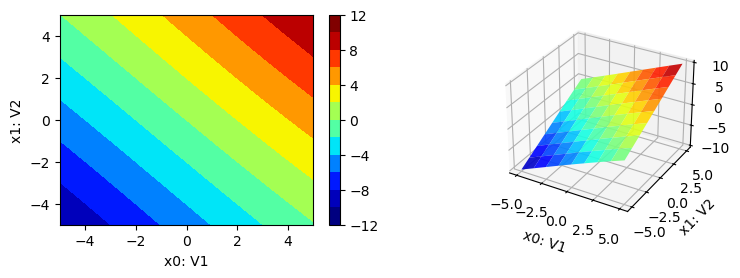

V1:  100.0
V2:  100.0
V3:  100.0


In [4]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, surrogate_control_init
from spotPython.spot import spot
import matplotlib.pyplot as plt

# Define the function
fun = analytical().fun_linear
# Define variables as input to the function
fun_control = fun_control_init(
              PREFIX="10",
              lower = -5.0*np.ones(3),
              upper = 5.0*np.ones(3),
              var_name=["V1", "V2", "V3"],
              show_progress=True)
#Define a surrogate
surrogate_control = surrogate_control_init(n_theta=3)
#Give input to SPOT
spot_3 = spot.Spot(fun=fun,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
#Run Spot
spot_3.run()
_ = spot_3.print_results()
spot_3.plot_contour(i=0, j=1)
spot_3.plot_contour(i=1, j=2)
spot_3.plot_contour(i=0, j=2)

_ = spot_3.print_importance()
spot_3.plot_importance()

## Exercises Chapter 09:  Isotropic and Anisotropic Kriging
 
* The following exercises refer to chapter 09 of the book, see [https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/009_num_spot_anisotropic.html](https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/009_num_spot_anisotropic.html).
 
### 1. The Branin Function `fun_branin`
 
```
y = a * (x2 - b * x1**2 + c * x1 - r)**2 + s * (1 - t) * np.cos(x1) + s
 
where the values of the parameters are:
- a = 1
- b = 5.1 / (4 * pi**2)
- c = 5 / pi
- r = 6
- s = 10
- t = 1 / (8 * pi)
 
It has three global minima:
f(x) = 0.397887 at (-pi, 12.275), (pi, 2.275), and (9.42478, 2.475).
``````
 
* Describe the function.
  * The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 10$ and $0 \leq x_2 \leq 15$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion: instead of the number of evaluations (which is specified via `fun_evals`), the time should be used as the termination criterion. This can be done as follows (`max_time=1` specifies a run time of one minute):

### Isotropic and Anisotropic with time = 1 min

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import fun_control_init, surrogate_control_init
from math import inf
#Isotropic Branin Function
PREFIX="003"
fun = analytical().fun_branin
fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=1,
                               lower = np.array([-5, 0]),
                               upper = np.array([10, 15]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

[rank: 0] Seed set to 123
[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c02-b04_2024-05-21_13-23-18 for SummaryWriter()
spotPython tuning: 3.146896546946783 [----------] 0.31% 
spotPython tuning: 3.146896546946783 [----------] 0.62% 
spotPython tuning: 3.146896546946783 [----------] 0.99% 
spotPython tuning: 3.146896546946783 [----------] 1.35% 
spotPython tuning: 1.1487866236306008 [----------] 1.73% 
spotPython tuning: 1.0240824742350494 [----------] 2.11% 
spotPython tuning: 0.4211249770550065 [----------] 2.55% 
spotPython tuning: 0.40198655236716263 [----------] 3.03% 
spotPython tuning: 0.3991783652663141 [----------] 3.61% 
spotPython tuning: 0.3991783652663141 [----------] 4.11% 
spotPython tuning: 0.3991783652663141 [----------] 4.57% 
spotPython tuning: 0.3991783652663141 [#---------] 5.01% 
spotPython tuning: 0.3991783652663141 [#---------] 5.51% 
spotPython tuning: 0.3991783652663141 [#---------] 6.01% 
spotPython tuning: 0.3991783652663141 [#---------] 6.62% 
spotPython tuning: 0.39883116428530

array([-1.42962125])

spotPython tuning: 3.800462807494956 [----------] 0.41% 
spotPython tuning: 3.800462807494956 [----------] 0.87% 
spotPython tuning: 3.1589357387738524 [----------] 1.35% 
spotPython tuning: 3.134400412616152 [----------] 1.82% 
spotPython tuning: 2.9066716414049374 [----------] 2.38% 
spotPython tuning: 0.4143165308821022 [----------] 3.02% 
spotPython tuning: 0.4041224802204155 [----------] 3.61% 
spotPython tuning: 0.3987714674290057 [----------] 4.24% 
spotPython tuning: 0.3987714674290057 [----------] 4.85% 
spotPython tuning: 0.3987714674290057 [#---------] 5.51% 
spotPython tuning: 0.3987714674290057 [#---------] 6.14% 
spotPython tuning: 0.3987714674290057 [#---------] 6.98% 
spotPython tuning: 0.3987714674290057 [#---------] 7.64% 
spotPython tuning: 0.3987714674290057 [#---------] 8.48% 
spotPython tuning: 0.3987714674290057 [#---------] 9.28% 
spotPython tuning: 0.3984374184973323 [#---------] 10.06% 
spotPython tuning: 0.39794164248837127 [#---------] 11.10% 
spotPython tun

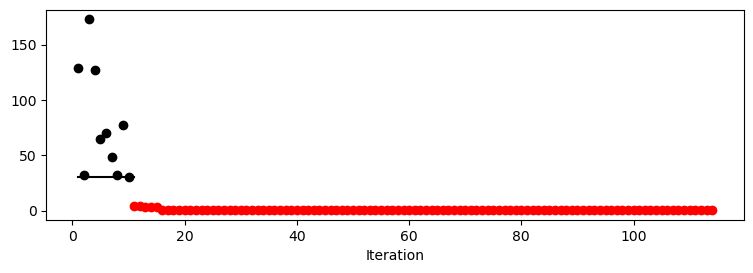

In [3]:
#Anisotropic  Branin Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta
spot_2_anisotropic.plot_progress()

### Isotropic and Anisotropic with time = 0.4 min

[rank: 0] Seed set to 123
[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c03-b01_2024-05-27_16-10-41 for SummaryWriter()
spotPython tuning: 3.146896546946783 [----------] 0.76% 
spotPython tuning: 3.146896546946783 [----------] 1.54% 
spotPython tuning: 3.146896546946783 [----------] 2.43% 
spotPython tuning: 3.146896546946783 [----------] 3.29% 
spotPython tuning: 1.1487866236306008 [----------] 4.22% 
spotPython tuning: 1.0240824742350494 [#---------] 5.14% 
spotPython tuning: 0.4211249770550065 [#---------] 6.19% 
spotPython tuning: 0.40198655236716263 [#---------] 7.34% 
spotPython tuning: 0.3991783652663141 [#---------] 8.77% 
spotPython tuning: 0.3991783652663141 [#---------] 9.99% 
spotPython tuning: 0.3991783652663141 [#---------] 11.08% 
spotPython tuning: 0.3991783652663141 [#---------] 12.14% 
spotPython tuning: 0.3991783652663141 [#---------] 13.32% 
spotPython tuning: 0.3991783652663141 [#---------] 14.52% 
spotPython tuning: 0.3991783652663141 [##--------] 15.96% 
spotPython tuning: 0.398831164

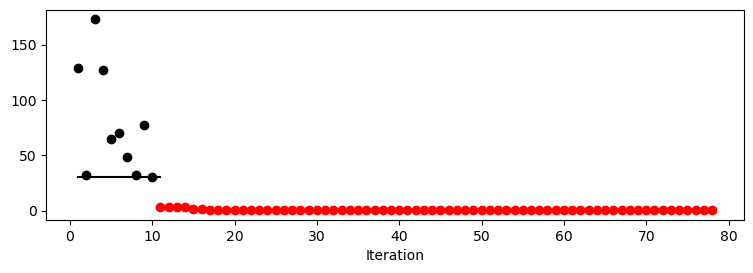

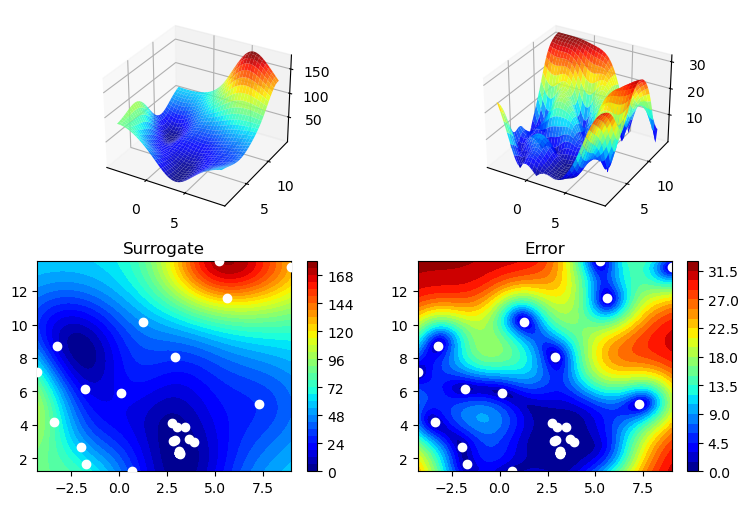

array([-0.99852039])

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import fun_control_init, surrogate_control_init
from math import inf
#Isotropic Branin Function
PREFIX="003"
fun = analytical().fun_branin
fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=0.4,
                               lower = np.array([-5, 0]),
                               upper = np.array([10, 15]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

spotPython tuning: 3.800462807494956 [----------] 1.00% 
spotPython tuning: 3.800462807494956 [----------] 2.12% 
spotPython tuning: 3.1589357387738524 [----------] 3.27% 
spotPython tuning: 3.134400412616152 [----------] 4.41% 
spotPython tuning: 2.9066716414049374 [#---------] 5.74% 
spotPython tuning: 0.4143165308821022 [#---------] 7.29% 
spotPython tuning: 0.4041224802204155 [#---------] 8.77% 
spotPython tuning: 0.3987714674290057 [#---------] 10.27% 
spotPython tuning: 0.3987714674290057 [#---------] 11.75% 
spotPython tuning: 0.3987714674290057 [#---------] 13.33% 
spotPython tuning: 0.3987714674290057 [#---------] 14.83% 
spotPython tuning: 0.3987714674290057 [##--------] 16.67% 
spotPython tuning: 0.3987714674290057 [##--------] 18.26% 
spotPython tuning: 0.3987714674290057 [##--------] 20.27% 
spotPython tuning: 0.3987714674290057 [##--------] 22.18% 
spotPython tuning: 0.3984374184973323 [##--------] 24.08% 
spotPython tuning: 0.39794164248837127 [###-------] 26.59% 
spotPy

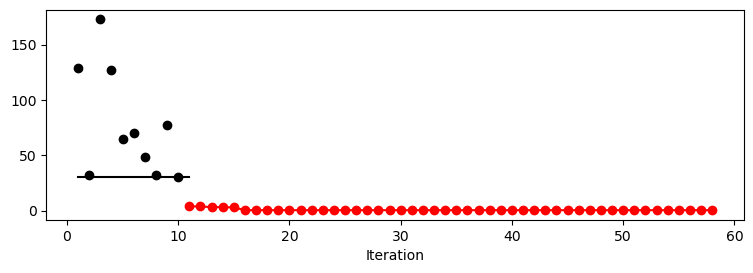

In [2]:
#Anisotropic  Branin Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta
spot_2_anisotropic.plot_progress()

## Result of Branin Function


| Function | n_theta | max_time(min) | Number of Evaluations | Number of Iterations | Objective function Value  |
|---------------------------|-------------------|----------|----------------------|----------|---------------------|
| Branin Function        	| 1                 | 1        | inf                  | 194      | 0.39790454173192735 |  
| Branin Function        	| 2                 | 1        | inf                  | 114      | 0.3979252227079453  |  
|Branin Function        	| 1                 | 0.4        | inf                  | 78      | 0.39801503764417845 |    
| Branin Function       	| 2                 | 0.4        | inf                  | 58      | 0.39794164248837127  |  


Increasing `n_theta` from 1 to 2 generally improves optimization efficiency by reducing the number of iterations required, as seen with iterations dropping from 194 to 114 for `max_time` set to 1 minute and from 78 to 58 for `max_time` set to 0.4 minutes. However, reducing `max_time` from 1 minute to 0.4 minutes results in a slight increase in the objective function value, indicating a trade-off between optimization performance and convergence speed.



### 2. The Two-dimensional Sin-Cos Function `fun_sin_cos`
 
* Describe the function.

     ```

     * Sinusoidal function.

        Args:

            X (array):

                input

            fun_control (dict):

                dict with entries `sigma` (noise level) and `seed` (random seed).
 
        Returns:

            (np.ndarray): A 1D numpy array with shape (n,) containing the calculated values. 

            * """Sinusoidal function.

                    Args:

                        X (array):

                            input

                        fun_control (dict):

                            dict with entries `sigma` (noise level) and `seed` (random seed).
 
                    Returns:

                        (np.ndarray): A 1D numpy array with shape (n,) containing the calculated values.

            ````


  *  The input dimension is `2`. The search range is  $-2\pi \leq x_1 \leq 2\pi$ and $-2\pi \leq x_2 \leq 2\pi$.

* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.

* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`


### Isotropic and Anisotropic with time = 1 min

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c02-b04_2024-05-21_13-27-49 for SummaryWriter()
spotPython tuning: -2.032916688789623 [----------] 0.38% 
spotPython tuning: -2.388464187850052 [----------] 0.79% 
spotPython tuning: -2.4732239160328326 [----------] 1.13% 
spotPython tuning: -2.4732239160328326 [----------] 1.52% 
spotPython tuning: -2.4892152901553843 [----------] 1.84% 
spotPython tuning: -2.4991257784759258 [----------] 2.19% 
spotPython tuning: -2.4991257784759258 [----------] 2.54% 
spotPython tuning: -2.4999988700971447 [----------] 2.88% 
spotPython tuning: -2.499999950865807 [----------] 3.25% 
spotPython tuning: -2.4999999509691717 [----------] 3.58% 
spotPython tuning: -2.499999956610016 [----------] 3.89% 
spotPython tuning: -2.499999956610016 [----------] 4.21% 
spotPython tuning: -2.4999999618068043 [----------] 4.55% 
spotPython tuning: -2.4999999618068043 [----------] 4.87% 
spotPython tuning: -2.4999999675987525 [#---------] 5.26% 
spotPython tuning: -2.

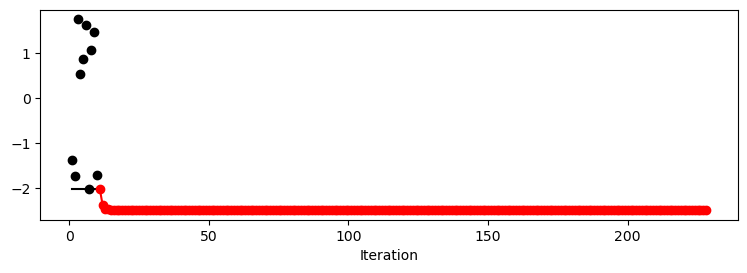

array([-1.01591397])

In [4]:
#Isotropic  Sin-Cos Function
PREFIX="003"
fun = analytical().fun_sin_cos
a = 2* np.pi
#print(a)
fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=1,
                               lower = np.array([-a,-a]),
                               upper = np.array([a,a]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

In [5]:
#Anisotropic Sin-Cos Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

spotPython tuning: -2.2653112883046314 [----------] 0.54% 
spotPython tuning: -2.2653112883046314 [----------] 1.11% 
spotPython tuning: -2.2653112883046314 [----------] 1.62% 
spotPython tuning: -2.454202160223451 [----------] 2.20% 
spotPython tuning: -2.458521375229338 [----------] 2.71% 
spotPython tuning: -2.482462560531697 [----------] 3.30% 
spotPython tuning: -2.482925901019679 [----------] 3.76% 
spotPython tuning: -2.4904698041359308 [----------] 4.31% 
spotPython tuning: -2.4991596489166508 [----------] 4.80% 
spotPython tuning: -2.499962076699469 [#---------] 5.41% 
spotPython tuning: -2.4999776386398036 [#---------] 6.06% 
spotPython tuning: -2.4999799363486916 [#---------] 6.60% 
spotPython tuning: -2.4999804518304902 [#---------] 7.29% 
spotPython tuning: -2.499981664757109 [#---------] 7.88% 
spotPython tuning: -2.499981664757109 [#---------] 8.47% 
spotPython tuning: -2.49998242826458 [#---------] 9.11% 
spotPython tuning: -2.4999825326495873 [#---------] 9.86% 
spotPy

array([-0.84830163, -1.22843865])

### Isotropic and Anisotropic with Time = 0.4 min

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c03-b01_2024-05-27_16-26-32 for SummaryWriter()
spotPython tuning: -2.032916688789623 [----------] 1.09% 
spotPython tuning: -2.388464187850052 [----------] 2.06% 
spotPython tuning: -2.4732239160328326 [----------] 2.86% 
spotPython tuning: -2.4732239160328326 [----------] 3.81% 
spotPython tuning: -2.4892152901553843 [----------] 4.59% 
spotPython tuning: -2.4991257784759258 [#---------] 5.42% 
spotPython tuning: -2.4991257784759258 [#---------] 6.26% 
spotPython tuning: -2.4999988700971447 [#---------] 7.07% 
spotPython tuning: -2.499999950865807 [#---------] 7.95% 
spotPython tuning: -2.4999999509691717 [#---------] 8.74% 
spotPython tuning: -2.499999956610016 [#---------] 9.49% 
spotPython tuning: -2.499999956610016 [#---------] 10.26% 
spotPython tuning: -2.4999999618068043 [#---------] 11.07% 
spotPython tuning: -2.4999999618068043 [#---------] 11.82% 
spotPython tuning: -2.4999999675987525 [#---------] 12.74% 
spotPython tuning:

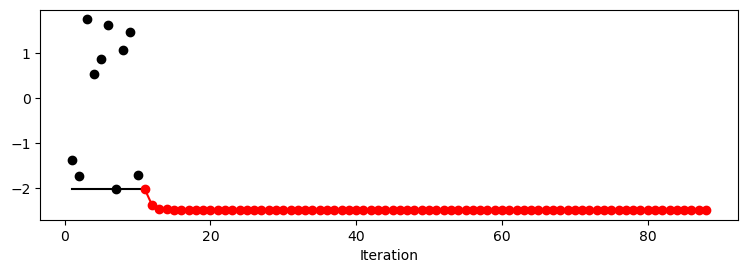

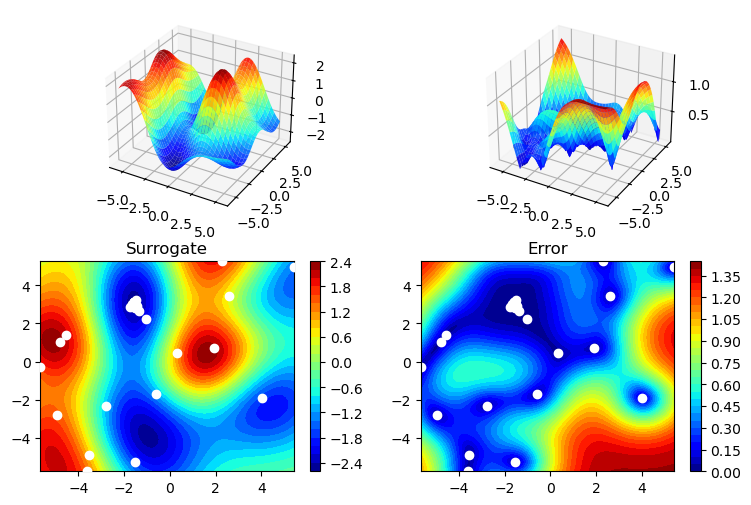

array([-0.88803075])

In [3]:
#Isotropic  Sin-Cos Function
PREFIX="003"
fun = analytical().fun_sin_cos
a = 2* np.pi
#print(a)
fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=0.4,
                               lower = np.array([-a,-a]),
                               upper = np.array([a,a]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

spotPython tuning: -2.2653112883046314 [----------] 1.32% 
spotPython tuning: -2.2653112883046314 [----------] 2.71% 
spotPython tuning: -2.2653112883046314 [----------] 3.92% 
spotPython tuning: -2.454202160223451 [#---------] 5.37% 
spotPython tuning: -2.458521375229338 [#---------] 6.58% 
spotPython tuning: -2.482462560531697 [#---------] 8.00% 
spotPython tuning: -2.482925901019679 [#---------] 9.12% 
spotPython tuning: -2.4904698041359308 [#---------] 10.42% 
spotPython tuning: -2.4991596489166508 [#---------] 11.60% 
spotPython tuning: -2.499962076699469 [#---------] 13.05% 
spotPython tuning: -2.4999776386398036 [#---------] 14.59% 
spotPython tuning: -2.4999799363486916 [##--------] 15.86% 
spotPython tuning: -2.4999804518304902 [##--------] 17.51% 
spotPython tuning: -2.499981664757109 [##--------] 18.93% 
spotPython tuning: -2.499981664757109 [##--------] 20.18% 
spotPython tuning: -2.49998242826458 [##--------] 21.72% 
spotPython tuning: -2.4999825326495873 [##--------] 23.5

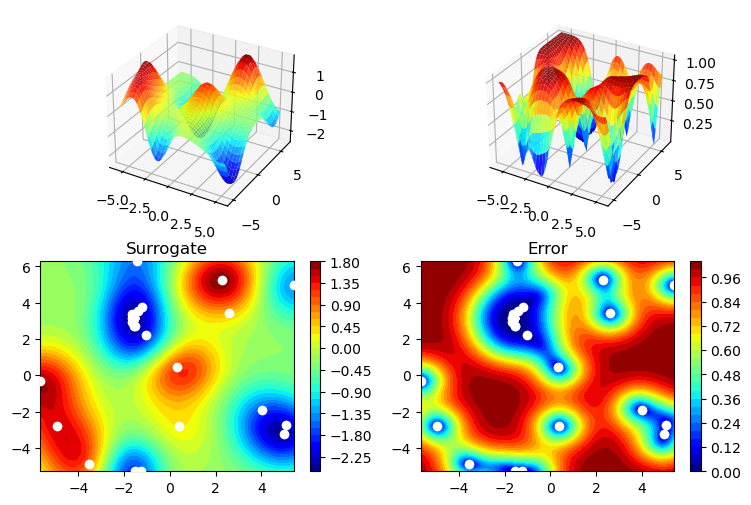

array([-0.50815466, -0.51579636])

In [4]:
#Anisotropic Sin-Cos Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

## Result of Sin-Cos Function


| Function | n_theta | max_time(min) | Number of Evaluations | Number of Iterations | Objective function Value  |
|---------------------------|-------------------|----------|----------------------|----------|---------------------|
| Sin-Cos Function        	| 1                 | 1        | inf                  | 228      | -2.4999999675987525 |  
| Sin-Cos Function        	| 2                 | 1        | inf                  | 155      | -2.4999999996677  |  
|Sin-Cos Function        	| 1                 | 0.4        | inf                  | 88      | -2.4999999675987525 |    
| Sin-Cos Function       	| 2                 | 0.4        | inf                  | 68      | -2.4999999996677  |  

Increasing `n_theta` from 1 to 2 consistently reduces the number of iterations needed to reach the optimal objective function value for the Sin-Cos function, from 228 to 155 iterations for `max_time` set to 1 minute and from 88 to 68 iterations for `max_time` set to 0.4 minutes, while maintaining the same objective function value. This suggests that a higher `n_theta` improves optimization efficiency without compromising the quality of the solution.



### 3. The Two-dimensional Runge Function `fun_runge`
 
* Describe the function.
    ```
    * Formula: f(x) = 1/ (1 + sum(x_i) - offset)^2 
        Dim: k >= 1 
        Interval: -5 <= x <= 5
    ```
  *  The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.### 3. The Two-dimensional Runge Function `fun_runge`
 
* Describe the function.
    ```
    * Formula: f(x) = 1/ (1 + sum(x_i) - offset)^2 
        Dim: k >= 1 
        Interval: -5 <= x <= 5
    ```
  *  The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

### Isotropic and Anisotropic with time = 1 min

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c02-b04_2024-05-21_13-29-56 for SummaryWriter()
spotPython tuning: 0.028397462483452193 [----------] 0.30% 
spotPython tuning: 0.027658261922815508 [----------] 0.55% 
spotPython tuning: 0.027658261922815508 [----------] 0.90% 
spotPython tuning: 0.027391176020978375 [----------] 1.18% 
spotPython tuning: 0.02381296964249503 [----------] 1.57% 
spotPython tuning: 0.02381296964249503 [----------] 1.86% 
spotPython tuning: 0.02381296964249503 [----------] 2.22% 
spotPython tuning: 0.022058326824035742 [----------] 2.71% 
spotPython tuning: 0.022058326824035742 [----------] 3.03% 
spotPython tuning: 0.020829601115955484 [----------] 3.51% 
spotPython tuning: 0.020348168886124868 [----------] 3.94% 
spotPython tuning: 0.020348168886124868 [----------] 4.28% 
spotPython tuning: 0.0196078431372549 [----------] 4.93% 
spotPython tuning: 0.0196078431372549 [#---------] 5.47% 
spotPython tuning: 0.0196078431372549 [#---------] 6.01% 
spotPython 

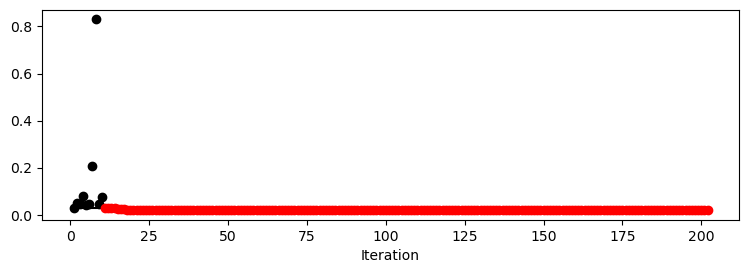

array([-0.83843666])

In [6]:
#Isotropic  Runge Function
PREFIX="003"
fun = analytical().fun_runge

fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=1,
                               lower = np.array([-5,-5]),
                               upper = np.array([5,5]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

In [7]:
#Anisotropic Runge Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

spotPython tuning: 0.028397462483452193 [----------] 0.45% 
spotPython tuning: 0.028397462483452193 [----------] 0.88% 
spotPython tuning: 0.028397462483452193 [----------] 1.32% 
spotPython tuning: 0.021438173065031263 [----------] 1.84% 
spotPython tuning: 0.021438173065031263 [----------] 2.37% 
spotPython tuning: 0.021438173065031263 [----------] 2.96% 
spotPython tuning: 0.0196078431372549 [----------] 3.91% 
spotPython tuning: 0.0196078431372549 [----------] 4.65% 
spotPython tuning: 0.0196078431372549 [#---------] 5.39% 
spotPython tuning: 0.0196078431372549 [#---------] 6.04% 
spotPython tuning: 0.0196078431372549 [#---------] 6.83% 
spotPython tuning: 0.0196078431372549 [#---------] 7.39% 
spotPython tuning: 0.0196078431372549 [#---------] 8.13% 
spotPython tuning: 0.0196078431372549 [#---------] 8.68% 
spotPython tuning: 0.0196078431372549 [#---------] 9.22% 
spotPython tuning: 0.0196078431372549 [#---------] 10.05% 
spotPython tuning: 0.0196078431372549 [#---------] 10.75% 


array([-1.90286797, -0.13144966])

### Isotropic and Anisotropic with time = 0.4 min

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c03-b01_2024-05-27_16-42-01 for SummaryWriter()
spotPython tuning: 0.028397462483452193 [----------] 0.74% 
spotPython tuning: 0.027658261922815508 [----------] 1.36% 
spotPython tuning: 0.027658261922815508 [----------] 2.20% 
spotPython tuning: 0.027391176020978375 [----------] 2.86% 
spotPython tuning: 0.02381296964249503 [----------] 3.80% 
spotPython tuning: 0.02381296964249503 [----------] 4.51% 
spotPython tuning: 0.02381296964249503 [#---------] 5.37% 
spotPython tuning: 0.022058326824035742 [#---------] 6.52% 
spotPython tuning: 0.022058326824035742 [#---------] 7.29% 
spotPython tuning: 0.020829601115955484 [#---------] 8.30% 
spotPython tuning: 0.020348168886124868 [#---------] 9.33% 
spotPython tuning: 0.020348168886124868 [#---------] 10.20% 
spotPython tuning: 0.0196078431372549 [#---------] 11.73% 
spotPython tuning: 0.0196078431372549 [#---------] 13.05% 
spotPython tuning: 0.0196078431372549 [#---------] 14.35% 
spotPyt

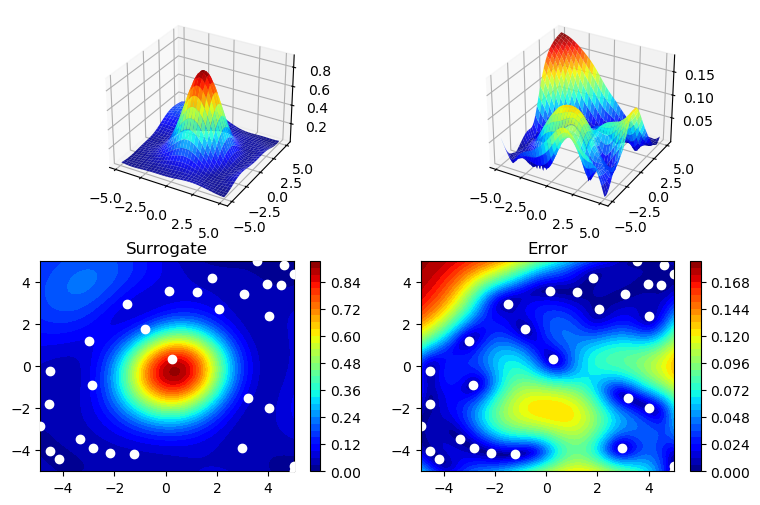

array([-0.80725198])

In [6]:
#Isotropic  Runge Function
PREFIX="003"
fun = analytical().fun_runge

fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=0.4,
                               lower = np.array([-5,-5]),
                               upper = np.array([5,5]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

spotPython tuning: 0.028397462483452193 [----------] 1.05% 
spotPython tuning: 0.028397462483452193 [----------] 2.10% 
spotPython tuning: 0.028397462483452193 [----------] 3.16% 
spotPython tuning: 0.021438173065031263 [----------] 4.39% 
spotPython tuning: 0.021438173065031263 [#---------] 5.63% 
spotPython tuning: 0.021438173065031263 [#---------] 7.01% 
spotPython tuning: 0.0196078431372549 [#---------] 9.30% 
spotPython tuning: 0.0196078431372549 [#---------] 11.05% 
spotPython tuning: 0.0196078431372549 [#---------] 12.81% 
spotPython tuning: 0.0196078431372549 [#---------] 14.37% 
spotPython tuning: 0.0196078431372549 [##--------] 16.24% 
spotPython tuning: 0.0196078431372549 [##--------] 17.56% 
spotPython tuning: 0.0196078431372549 [##--------] 19.35% 
spotPython tuning: 0.0196078431372549 [##--------] 20.70% 
spotPython tuning: 0.0196078431372549 [##--------] 21.99% 
spotPython tuning: 0.0196078431372549 [##--------] 23.94% 
spotPython tuning: 0.0196078431372549 [###-------] 

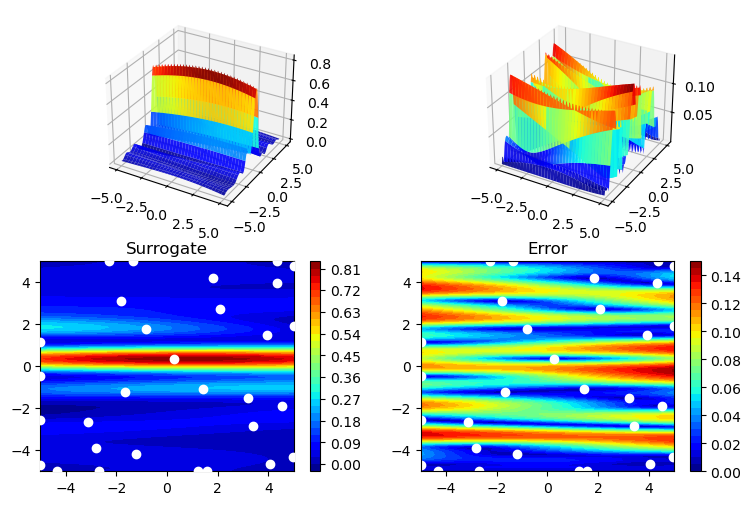

array([-2.31090925,  0.43464023])

In [7]:
#Anisotropic Runge Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

## Result

| Function | n_theta | max_time(min) | Number of Evaluations | Number of Iterations | Objective function Value  |
|---------------------------|-------------------|----------|----------------------|----------|---------------------|
| Runge Function        	| 1                 | 1          | inf                  | 202      | 0.0196078431372549  |  
| Runge Function        	| 2                 | 1          | inf                  | 138      | 0.0196078431372549  |  
| Runge Function        	| 1                 | 0.4        | inf                  | 88       | 0.0196078431372549  |    
| Runge Function        	| 2                 | 0.4        | inf                  | 67       | 0.0196078431372549  |  

Increasing `n_theta` from 1 to 2 reduces the number of iterations required to reach the optimal objective function value for the Runge function, from 202 to 138 iterations for `max_time` set to 1 minute and from 88 to 67 iterations for `max_time` set to 0.4 minutes. This indicates that a higher `n_theta` improves optimization efficiency without affecting the quality of the solution.


### 4. The Ten-dimensional Wing-Weight Function `fun_wingwt`
 
* Describe the function.
    ```
    * Example from Forrester et al. to understand the weight of an unpainted light aircraft wing as a function of nine design and operational parameters: 
        * W = 0.036 S_W0.758 * Wfw0.0035 ( A / (cos2 Lambda))0.6 * q0.006 * lambda0.04 * ( (100 Rtc)/(cos Lambda) ))-0.3* (Nz Wdg)0.49
    ```
  *  The input dimension is `10`. The search ranges are between 0 and 1 (values are mapped internally to their natural bounds).
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.


### Isotropic and Anisotropic with Time = 1 min

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c02-b04_2024-05-21_13-32-03 for SummaryWriter()
spotPython tuning: 181.85467170304693 [----------] 2.05% 
spotPython tuning: 127.42305098146872 [#---------] 7.06% 
spotPython tuning: 126.99585019636925 [#---------] 11.14% 
spotPython tuning: 126.99582536475548 [#---------] 14.76% 
spotPython tuning: 126.99582536475548 [##--------] 19.23% 
spotPython tuning: 126.99582536475548 [##--------] 23.80% 
spotPython tuning: 125.75754761859794 [###-------] 28.11% 
spotPython tuning: 125.19270696347755 [###-------] 33.05% 
spotPython tuning: 125.19270696347755 [####------] 38.41% 
spotPython tuning: 125.16786252715022 [####------] 43.93% 
spotPython tuning: 125.15079569005242 [#####-----] 48.92% 
spotPython tuning: 125.14790023857168 [#####-----] 54.75% 
spotPython tuning: 125.14790023857168 [######----] 60.09% 
spotPython tuning: 123.97787541186656 [#######---] 65.95% 
spotPython tuning: 123.95017737468233 [#######---] 70.81% 
spotPython tuning: 

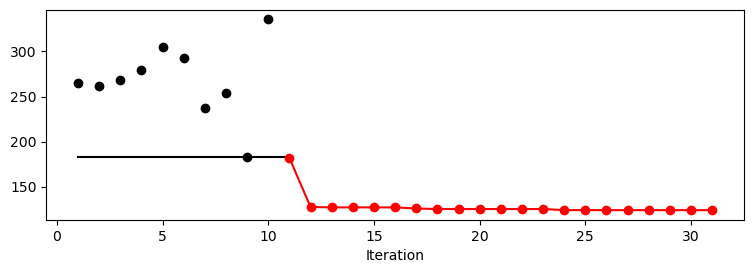

array([-0.5573158])

In [8]:
#Isotropic  Wing-Weight Function
PREFIX="003"
fun = analytical().fun_wingwt

fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=1,
                               lower = np.array([0,0,0,0,0,0,0,0,0,0]),
                               upper = np.array([1,1,1,1,1,1,1,1,1,1]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

In [9]:
#Anisotropic Wing-Weight Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

spotPython tuning: 130.98167265774384 [----------] 4.62% 
spotPython tuning: 124.96150746789587 [#---------] 14.06% 
spotPython tuning: 123.38367978743302 [##--------] 23.02% 
spotPython tuning: 123.38367978743302 [###-------] 29.88% 
spotPython tuning: 123.38367978743302 [####------] 35.69% 
spotPython tuning: 123.38346849453022 [####------] 44.55% 
spotPython tuning: 123.38346849423637 [#####-----] 52.47% 
spotPython tuning: 123.38346849423637 [######----] 60.56% 
spotPython tuning: 123.383468440801 [#######---] 66.06% 
spotPython tuning: 123.38346844053387 [#######---] 72.13% 
spotPython tuning: 123.38346842534199 [########--] 78.46% 
spotPython tuning: 123.38346842534199 [#########-] 85.51% 
spotPython tuning: 123.38346842534199 [#########-] 93.36% 
spotPython tuning: 123.38346842534199 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '003',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_ou

array([-0.64145565,  0.12836716, -2.4279085 , -1.35010903, -2.99706243,
       -1.74992045, -0.89388034,  1.3560256 , -2.59696482, -2.99331943])

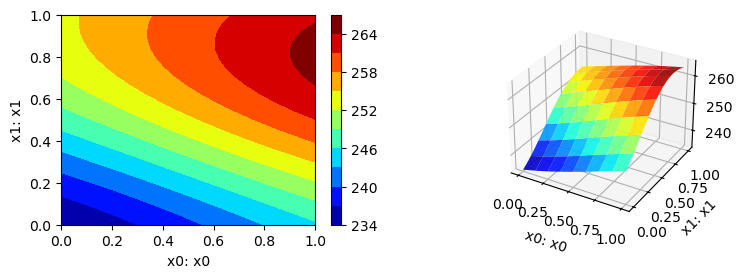

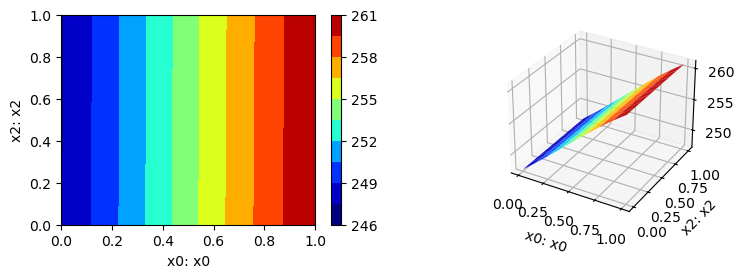

x0:  1.0058164788818371
x1:  5.920270576451609
x3:  0.19672763310138394
x6:  0.5624631299436303
x7:  99.99999999999999


In [10]:
min_z = None
max_z = None
spot_2_anisotropic.plot_contour(i=0, j=1, min_z=min_z, max_z=max_z)
spot_2_anisotropic.plot_contour(i=0, j=2, min_z=min_z, max_z=max_z)
spot_2_anisotropic.plot_contour(i=0, j=3, min_z=min_z, max_z=max_z)
_ = spot_2_anisotropic.print_importance()
spot_2_anisotropic.plot_importance()

### Isotropic and Anisotropic with time = 0.4 min

In [8]:
#Isotropic  Wing-Weight Function
PREFIX="003"
fun = analytical().fun_wingwt

fun_control = fun_control_init(PREFIX=PREFIX,
                               fun_evals=inf,
                               max_time=0.4,
                               lower = np.array([0,0,0,0,0,0,0,0,0,0]),
                               upper = np.array([1,1,1,1,1,1,1,1,1,1]))
surrogate_control=surrogate_control_init(n_theta=1)
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()
spot_2.print_results()
spot_2.plot_progress()
spot_2.surrogate.plot()
spot_2.surrogate.theta

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_c03-b01_2024-05-27_16-55-18 for SummaryWriter()
spotPython tuning: 181.85467170304693 [#---------] 5.17% 
spotPython tuning: 127.42305098146872 [##--------] 17.09% 
spotPython tuning: 126.99585019636925 [###-------] 26.74% 
spotPython tuning: 126.99582536475548 [####------] 35.28% 
spotPython tuning: 126.99582536475548 [#####-----] 46.21% 
spotPython tuning: 126.99582536475548 [######----] 57.06% 
spotPython tuning: 125.75754761859794 [#######---] 67.23% 
spotPython tuning: 125.19270696347755 [########--] 78.71% 
spotPython tuning: 125.19270696347755 [#########-] 90.92% 
spotPython tuning: 125.16786252715022 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '003',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter':

array([-1.54038052])

spotPython tuning: 130.98167265774384 [#---------] 10.92% 
spotPython tuning: 124.96150746789587 [####------] 35.09% 
spotPython tuning: 123.38367978743302 [######----] 56.34% 
spotPython tuning: 123.38367978743302 [#######---] 72.84% 
spotPython tuning: 123.38367978743302 [#########-] 86.74% 
spotPython tuning: 123.38346849453022 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': '003',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 16,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': inf,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_grap

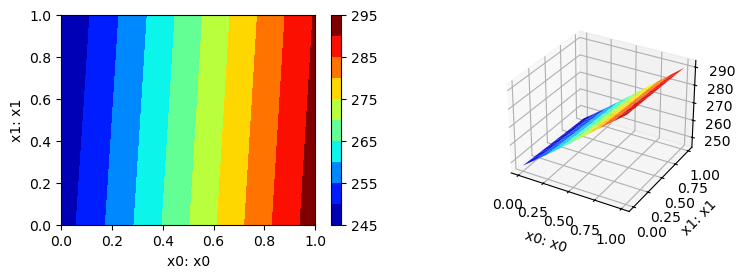

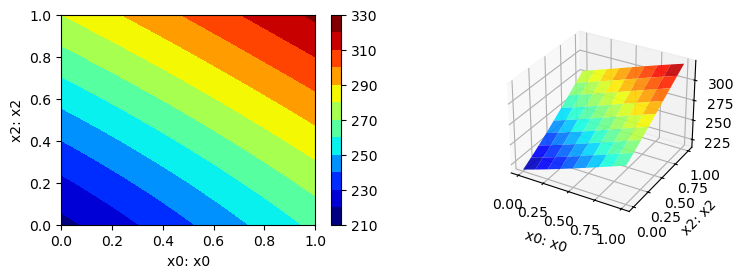

x0:  30.522852891835818
x1:  0.8192632987778713
x2:  54.87142904802777
x3:  11.01501019716264
x4:  0.3985278032783995
x5:  0.39936548743566913
x6:  31.133763206076143
x7:  100.0
x8:  79.71651781228421
x9:  36.35083758773278


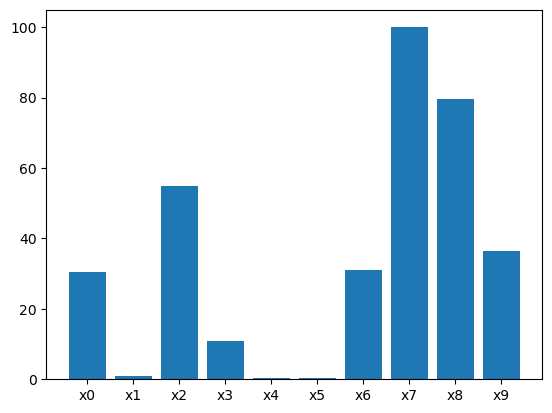

In [9]:
#Anisotropic Wing-Weight Function
surrogate_control = surrogate_control_init(n_theta=2)
spot_2_anisotropic = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_anisotropic.run()
spot_2_anisotropic.print_results()
spot_2_anisotropic.surrogate.plot()
spot_2_anisotropic.surrogate.theta

min_z = None
max_z = None
spot_2_anisotropic.plot_contour(i=0, j=1, min_z=min_z, max_z=max_z)
spot_2_anisotropic.plot_contour(i=0, j=2, min_z=min_z, max_z=max_z)
spot_2_anisotropic.plot_contour(i=0, j=3, min_z=min_z, max_z=max_z)
_ = spot_2_anisotropic.print_importance()
spot_2_anisotropic.plot_importance()

## Result

| Function | n_theta | max_time(min) | Number of Evaluations | Number of Iterations | Objective function Value  |
|---------------------------|-------------------|----------|----------------------|----------|---------------------|
| Wing-weight Function        	| 1                 | 1          | inf                  | 31      | 123.89321921573641  |  
| Wing-weight Function        	| 2                 | 1          | inf                  | 24      | 123.38346842534199  |  
| Wing-weight Function        	| 1                 | 0.4        | inf                  | 20       | 125.16786252715022  |    
| Wing-weight Function        	| 2                 | 0.4        | inf                  | 16       | 123.38346849453022  |  


The table presents the optimization results for the Wing-weight Function under varying conditions of n_thetan_theta (number of parameters) and max_timemax_time (maximum allowed time for optimization). It is observed that with n_theta=2n_theta=2, the optimization consistently yields a lower objective function value (123.383468) compared to n_theta=1n_theta=1 under the same max_timemax_time conditions. Additionally, reducing the max_timemax_time from 1 minute to 0.4 minutes decreases the number of iterations required for convergence, especially for n_theta=2n_theta=2. This suggests that increasing the number of parameters while slightly limiting the optimization time can still achieve efficient convergence with lower objective function values

## Exercises Chapter 10: Using sklearn Surrogates in spotPython

* The following exercises refer to chapter 10 of the book, see [https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/010_num_spot_sklearn_surrogate.html](https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/010_num_spot_sklearn_surrogate.html).




In [11]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.utils.init import fun_control_init, design_control_init
from spotPython.spot import spot

# Needed for the sklearn surrogates:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
S_XGB = HistGradientBoostingRegressor()
S_DTR = DecisionTreeRegressor()
S_RFR = RandomForestRegressor()
S_LR = LinearRegression()
S_R = Ridge()

### 1-dim sphere function fun_sphere

[rank: 0] Seed set to 123


spotPython tuning: 0.03475493366922229 [####------] 40.00% 


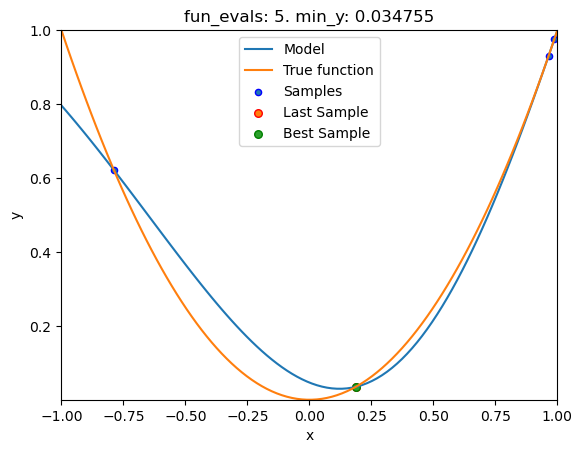

spotPython tuning: 0.03475493366922229 [#####-----] 50.00% 


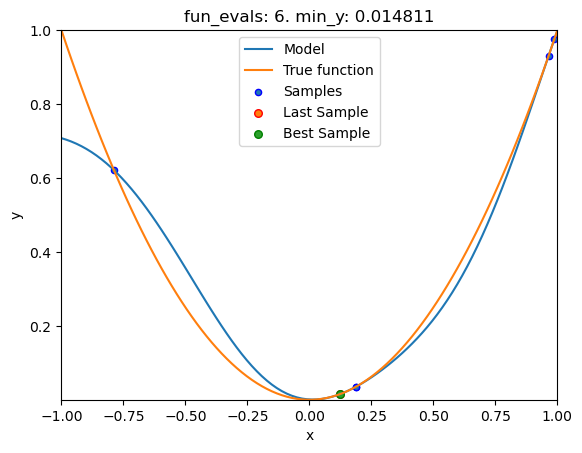

spotPython tuning: 0.014811361922947153 [######----] 60.00% 


spotPython tuning: 0.00019529794005791534 [#######---] 70.00% 


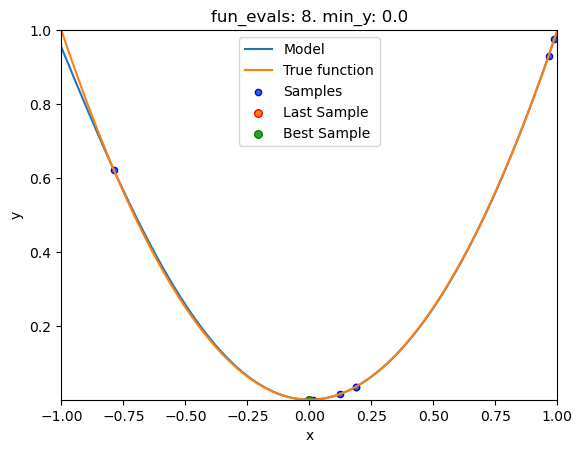

spotPython tuning: 5.4613089651542514e-08 [########--] 80.00% 


spotPython tuning: 5.4613089651542514e-08 [#########-] 90.00% 


spotPython tuning: 5.4613089651542514e-08 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': None,
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 10,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 10,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,
 'loss_function': None,
 'lower': array([-1]),
 'max_surrogate_points': 30,
 'max_time': inf,
 'metric_params': {},
 'metric_river': None,
 'metric_sklearn': None,
 'metric_sklearn_name': None,
 'metric_torch': None,
 'model_dict': {},
 'n_points': 1,
 'n_samples'

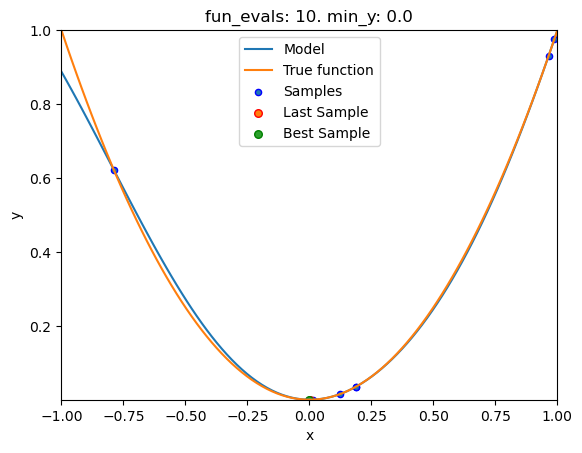

In [12]:
#1-dim sphere function fun_sphere using spotPython's internal Kriging
from spotPython.fun.objectivefunctions import analytical
fun_control = fun_control_init(
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals=10,
    max_time=inf,
    show_models= True,
    tolerance_x = np.sqrt(np.spacing(1)))
fun = analytical(seed=123).fun_sphere
design_control = design_control_init(
    init_size=3)
spot_1 = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control)
spot_1.run()
spot_1.print_results()
spot_1.plot_progress(log_y=True)
spot_1.plot_model()

### 1. A decision tree regressor: `DecisionTreeRegressor`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
* Use the surrogate as the model for optimization.


### A decision tree regressor: `DecisionTreeRegressor`
 
* The Decision Tree Regressor (DecisionTreeRegressor) is a flexible, non-linear regression model that constructs a tree to make predictions based on decision rules derived from the data. 
* It is particularly useful for capturing complex relationships in the data without assuming a specific form for the underlying function. 
* In the context of optimization, it serves as a surrogate model to approximate the objective function (e.g., the Sphere function) and guide the optimization process efficiently.

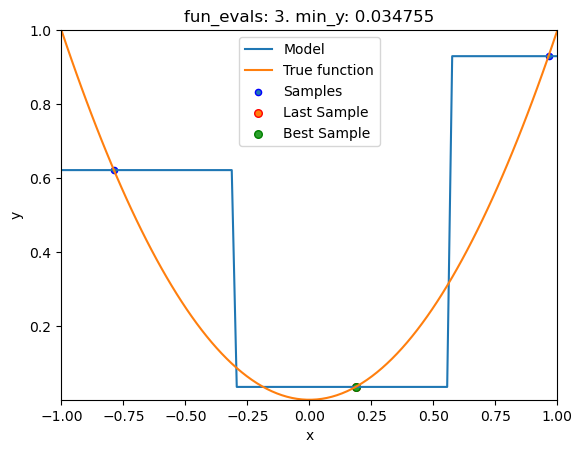

spotPython tuning: 0.02317347273817367 [####------] 40.00% 


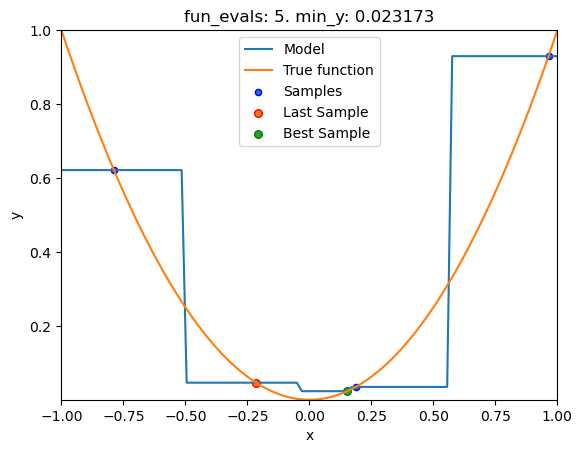

spotPython tuning: 0.02317347273817367 [#####-----] 50.00% 


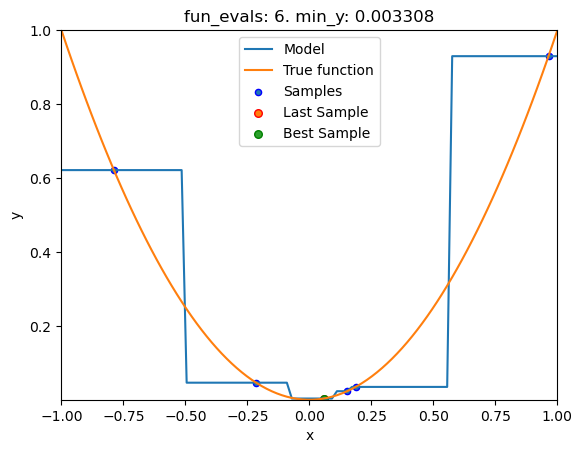

spotPython tuning: 0.003308345217006626 [######----] 60.00% 


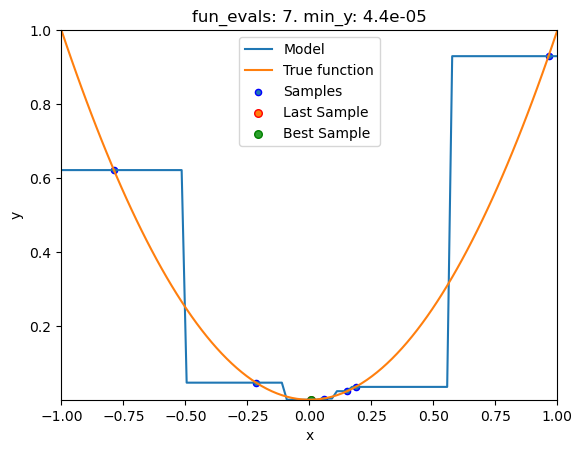

spotPython tuning: 4.364545534686172e-05 [#######---] 70.00% 


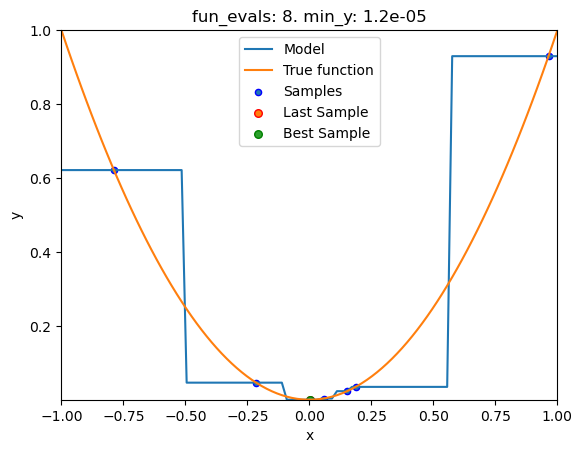

spotPython tuning: 1.189146537170763e-05 [########--] 80.00% 


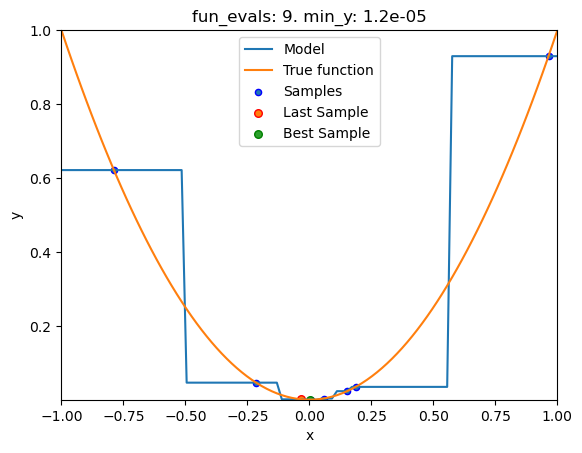

spotPython tuning: 1.189146537170763e-05 [#########-] 90.00% 


spotPython tuning: 1.189146537170763e-05 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': None,
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 10,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 10,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,
 'loss_function': None,
 'lower': array([-1]),
 'max_surrogate_points': 30,
 'max_time': inf,
 'metric_params': {},
 'metric_river': None,
 'metric_sklearn': None,
 'metric_sklearn_name': None,
 'metric_torch': None,
 'model_dict': {},
 'n_points': 1,
 'n_samples':

In [13]:
#1-dim sphere function fun_sphere using Sklearn Model DecisionTreeRegressor
spot_1_DTR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_DTR)
spot_1_DTR.run()
spot_1_DTR.print_results()
spot_1_DTR.plot_progress(log_y=True)
spot_1_DTR.plot_model()

### 2. A random forest regressor: `RandomForestRegressor`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).
* Use the surrogate as the model for optimization.


### A random forest regressor: `RandomForestRegressor`
 
* The Random Forest Regressor (RandomForestRegressor) is an ensemble learning model that leverages the power of multiple decision trees to improve prediction accuracy and reduce overfitting. 
* It achieves this through bootstrap sampling and feature randomness during tree construction. 
* In the context of optimization, it serves as a surrogate model to approximate the objective function (e.g., the Sphere function) and guide the optimization process efficiently.

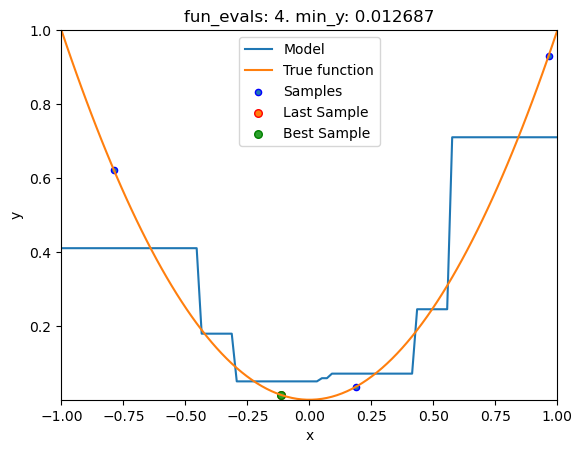

spotPython tuning: 0.012687060069554874 [####------] 40.00% 


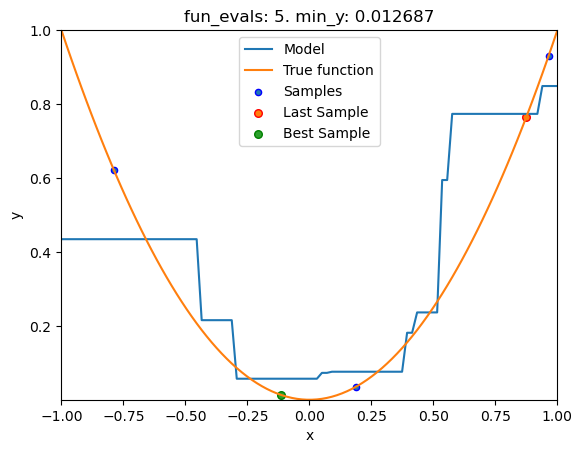

spotPython tuning: 0.012687060069554874 [#####-----] 50.00% 


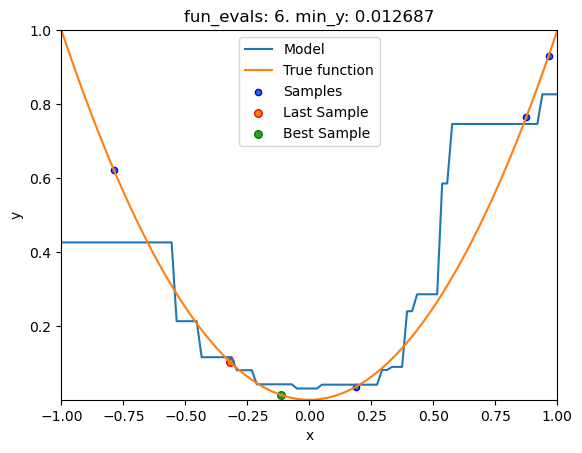

spotPython tuning: 0.012687060069554874 [######----] 60.00% 


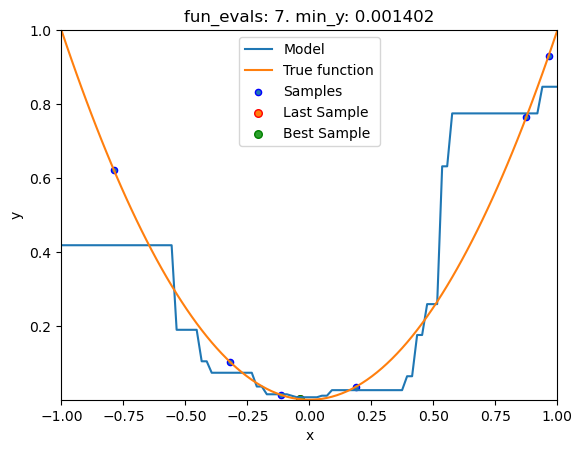

spotPython tuning: 0.0014024463394194796 [#######---] 70.00% 


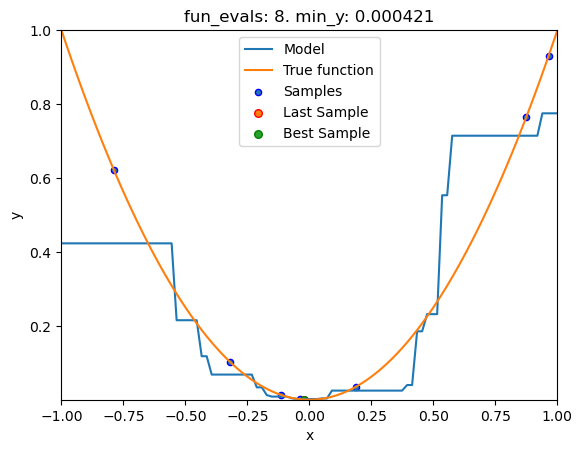

spotPython tuning: 0.0004211231331030619 [########--] 80.00% 


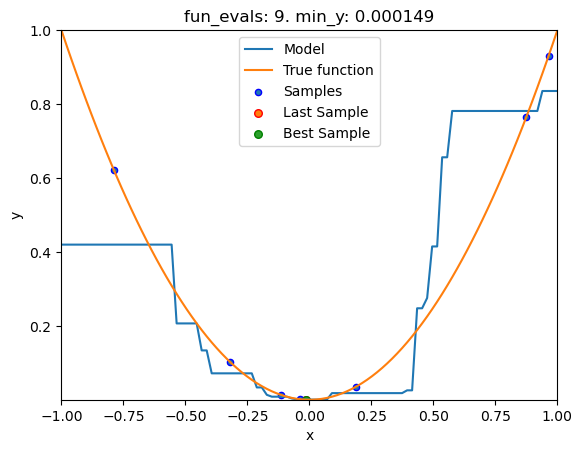

spotPython tuning: 0.00014944386805438418 [#########-] 90.00% 


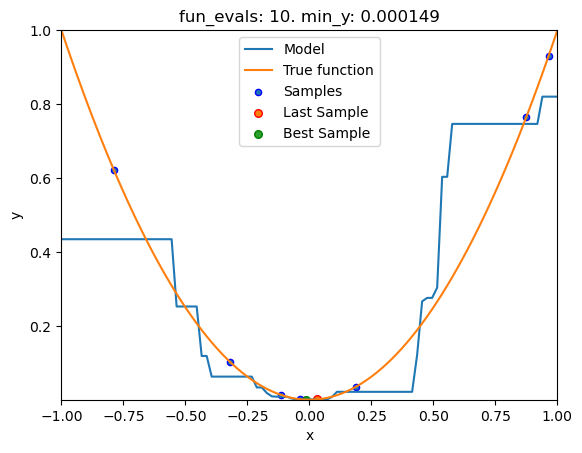

spotPython tuning: 0.00014944386805438418 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': None,
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 10,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 10,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,
 'loss_function': None,
 'lower': array([-1]),
 'max_surrogate_points': 30,
 'max_time': inf,
 'metric_params': {},
 'metric_river': None,
 'metric_sklearn': None,
 'metric_sklearn_name': None,
 'metric_torch': None,
 'model_dict': {},
 'n_points': 1,
 'n_samples'

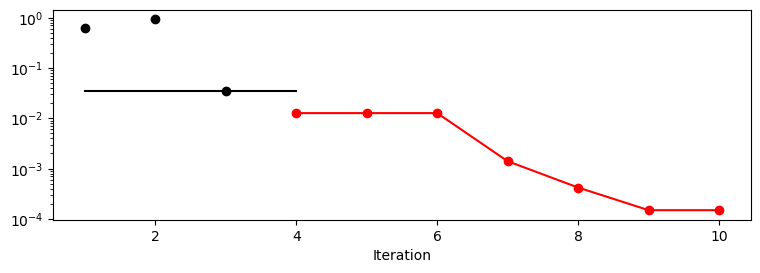

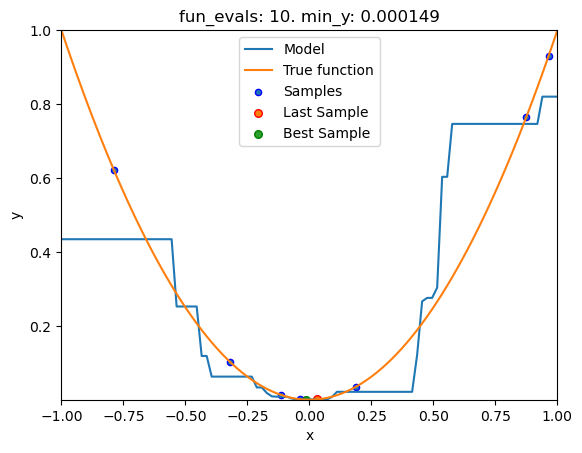

In [14]:
#1-dim sphere function fun_sphere using Sklearn Model RandomForestRegressor
spot_1_RFR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_RFR)
spot_1_RFR.run()
spot_1_RFR.print_results()
spot_1_RFR.plot_progress(log_y=True)
spot_1_RFR.plot_model()

### 3. Ordinary least squares Linear Regression: `LinearRegression` 

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
* Use the surrogate as the model for optimization.

### Ordinary least squares Linear Regression: `LinearRegression`
 
* Ordinary Least Squares (OLS) Linear Regression is a fundamental regression technique that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
* It aims to find the best-fit line by minimizing the sum of squared differences between observed and predicted values.

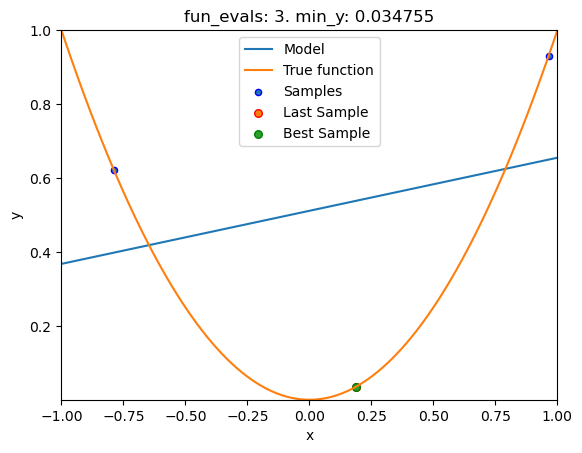

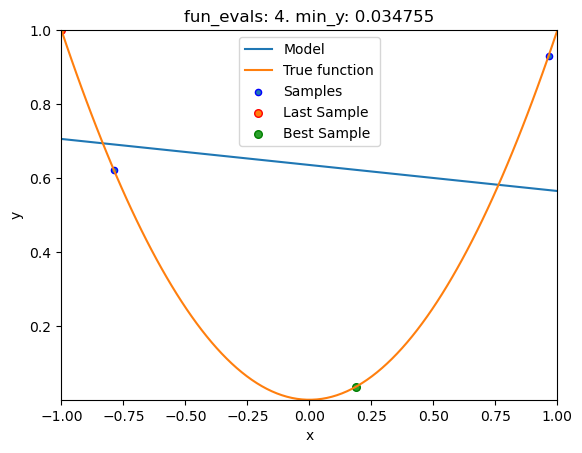

spotPython tuning: 0.03475493366922229 [####------] 40.00% 


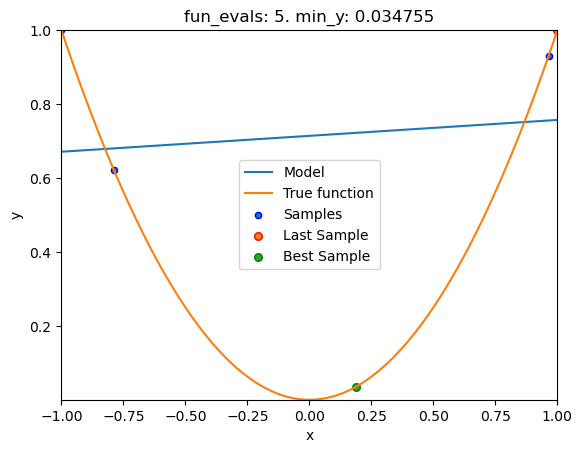

spotPython tuning: 0.03475493366922229 [#####-----] 50.00% 


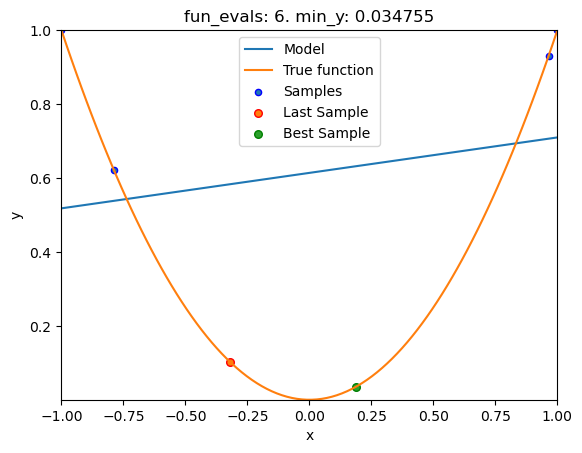

spotPython tuning: 0.03475493366922229 [######----] 60.00% 


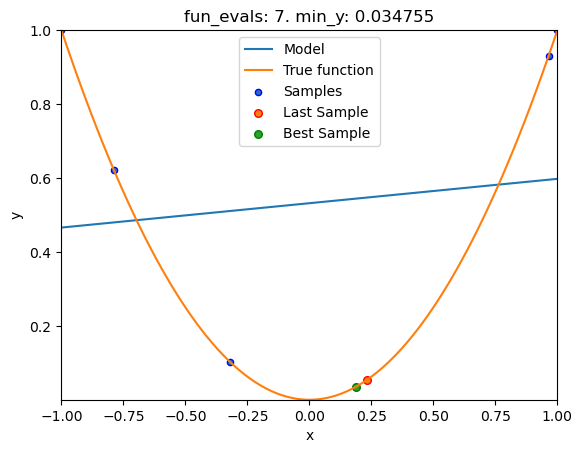

spotPython tuning: 0.03475493366922229 [#######---] 70.00% 


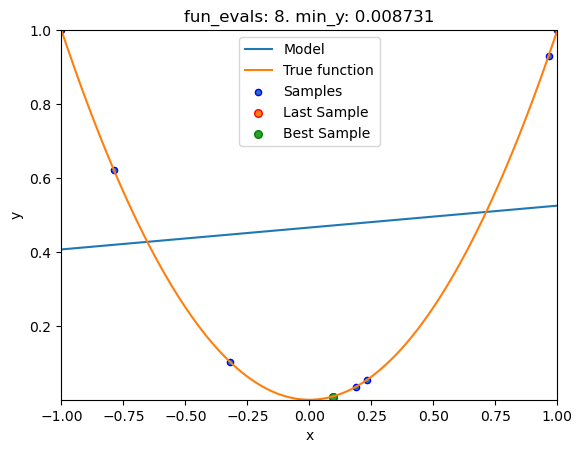

spotPython tuning: 0.008730885505764131 [########--] 80.00% 


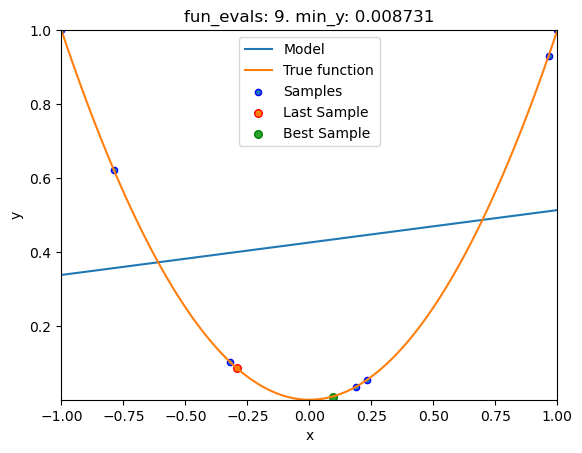

spotPython tuning: 0.008730885505764131 [#########-] 90.00% 


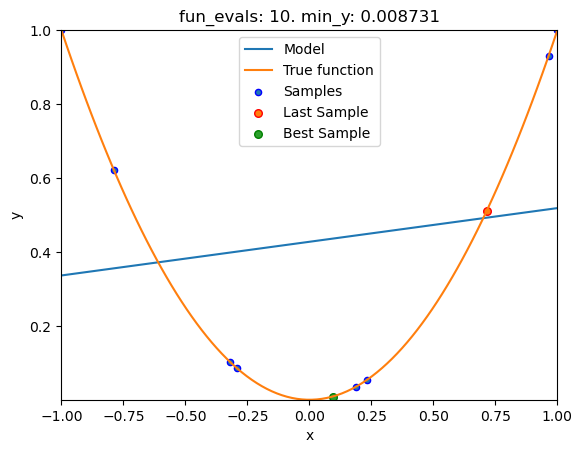

spotPython tuning: 0.008730885505764131 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': None,
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 10,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 10,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,
 'loss_function': None,
 'lower': array([-1]),
 'max_surrogate_points': 30,
 'max_time': inf,
 'metric_params': {},
 'metric_river': None,
 'metric_sklearn': None,
 'metric_sklearn_name': None,
 'metric_torch': None,
 'model_dict': {},
 'n_points': 1,
 'n_samples': 

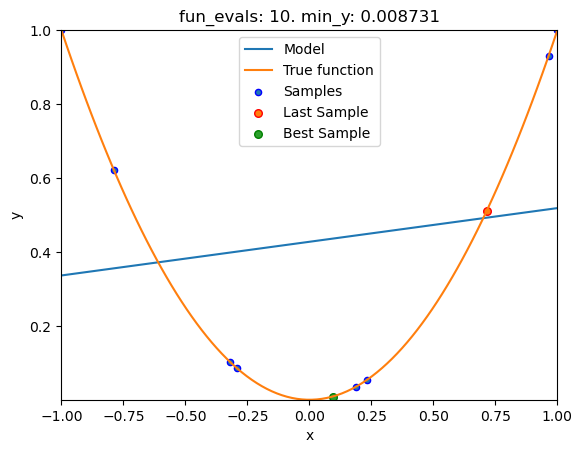

In [15]:
#1-dim sphere function fun_sphere using Sklearn Model LinearRegression
spot_1_LR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_LR)
spot_1_LR.run()
spot_1_LR.print_results()
spot_1_LR.plot_progress(log_y=True)
spot_1_LR.plot_model()

### 4. Linear least squares with l2 regularization: `Ridge`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).
* Use the surrogate as the model for optimization.

### Linear least squares with l2 regularization: `Ridge`
 
* Ridge Regression (Ridge) in Scikit-learn is a linear model that includes an L2 regularization term to prevent overfitting by penalizing large coefficients. 
* This regularization helps the model generalize better to unseen data. 
* When used as a surrogate model in optimization, Ridge Regression can approximate the objective function (e.g., the Sphere function) and guide the optimization process effectively.  

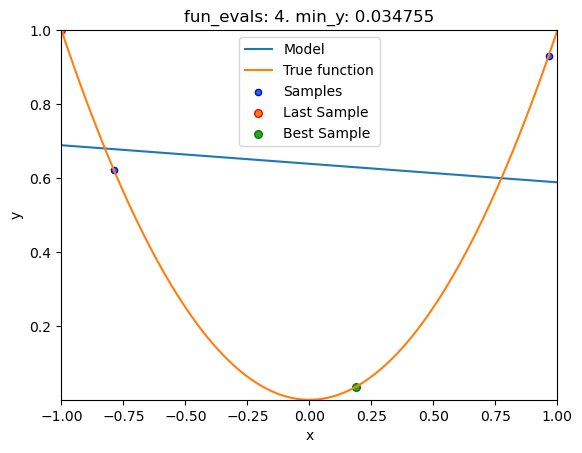

spotPython tuning: 0.03475493366922229 [####------] 40.00% 


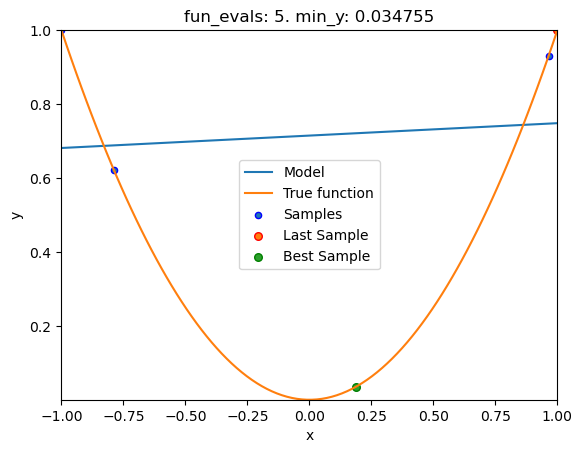

spotPython tuning: 0.03475493366922229 [#####-----] 50.00% 


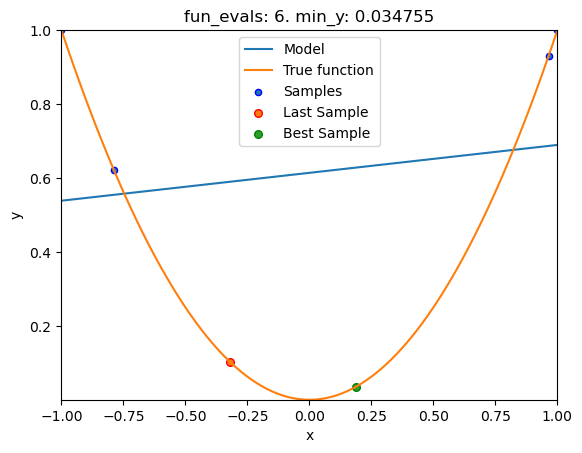

spotPython tuning: 0.03475493366922229 [######----] 60.00% 


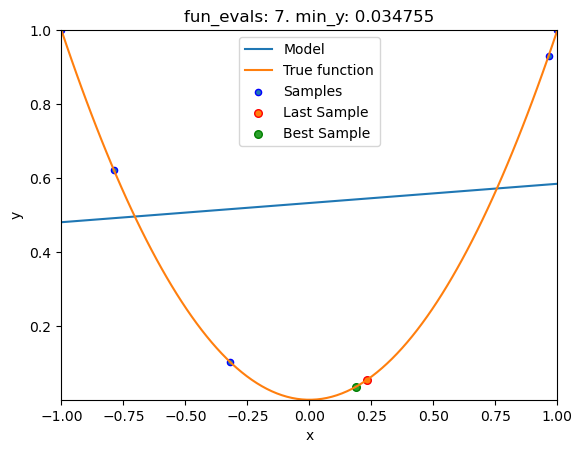

spotPython tuning: 0.03475493366922229 [#######---] 70.00% 


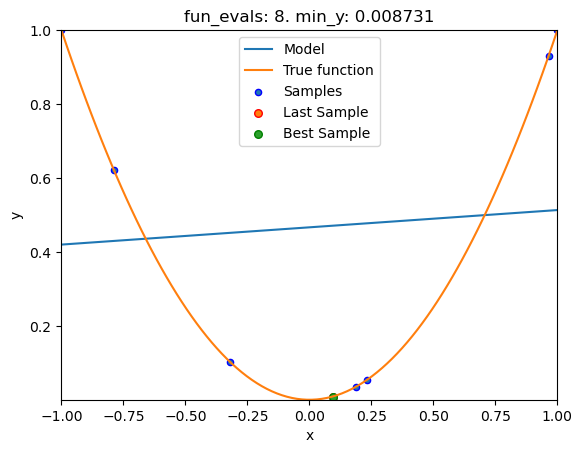

spotPython tuning: 0.008730885505764131 [########--] 80.00% 


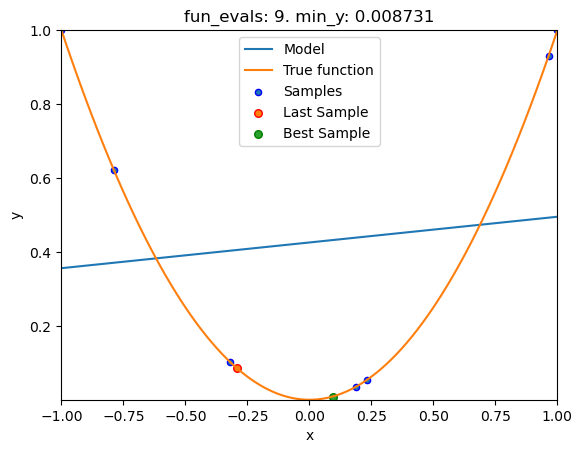

spotPython tuning: 0.008730885505764131 [#########-] 90.00% 


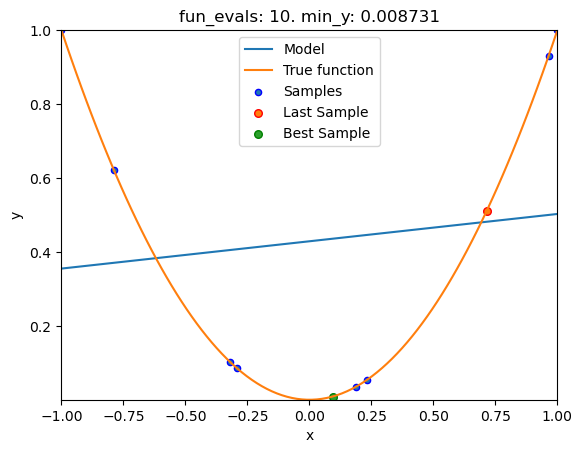

spotPython tuning: 0.008730885505764131 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': None,
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 10,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name': None,
 'db_dict_name': None,
 'design': None,
 'device': None,
 'devices': 1,
 'enable_progress_bar': False,
 'eval': None,
 'fun_evals': 10,
 'fun_repeats': 1,
 'horizon': None,
 'infill_criterion': 'y',
 'k_folds': 3,
 'log_graph': False,
 'log_level': 50,
 'loss_function': None,
 'lower': array([-1]),
 'max_surrogate_points': 30,
 'max_time': inf,
 'metric_params': {},
 'metric_river': None,
 'metric_sklearn': None,
 'metric_sklearn_name': None,
 'metric_torch': None,
 'model_dict': {},
 'n_points': 1,
 'n_samples': 

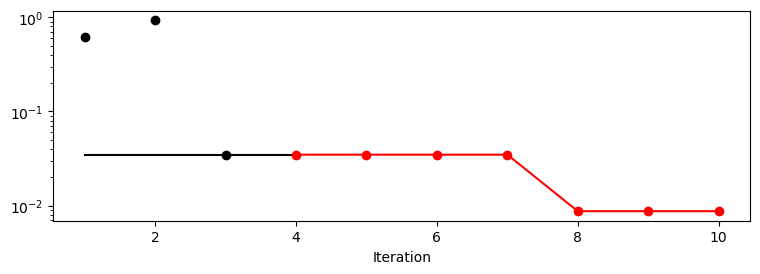

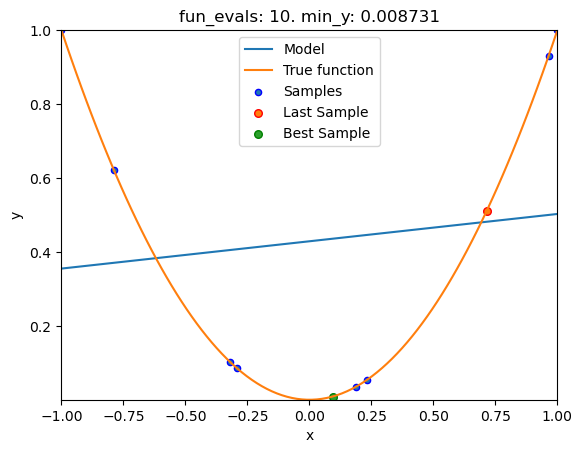

In [16]:
#1-dim sphere function fun_sphere using Sklearn Model Ridge
spot_1_R = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_R)
spot_1_R.run()
spot_1_R.print_results()
spot_1_R.plot_progress(log_y=True)
spot_1_R.plot_model()

### 2-dim Branin function fun_branin

[rank: 0] Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/BRANIN_c02-b03_2024-05-20_19-37-24 for SummaryWriter()
spotPython tuning: 3.146896546946783 [######----] 55.00% 
spotPython tuning: 3.146896546946783 [######----] 60.00% 
spotPython tuning: 3.146896546946783 [######----] 65.00% 
spotPython tuning: 3.146896546946783 [#######---] 70.00% 
spotPython tuning: 1.1487866236306008 [########--] 75.00% 
spotPython tuning: 1.0240824742350494 [########--] 80.00% 
spotPython tuning: 0.4211249770550065 [########--] 85.00% 
spotPython tuning: 0.40198655236716263 [#########-] 90.00% 
spotPython tuning: 0.3991783652663141 [##########] 95.00% 
spotPython tuning: 0.3991783652663141 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': 'BRANIN',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'count

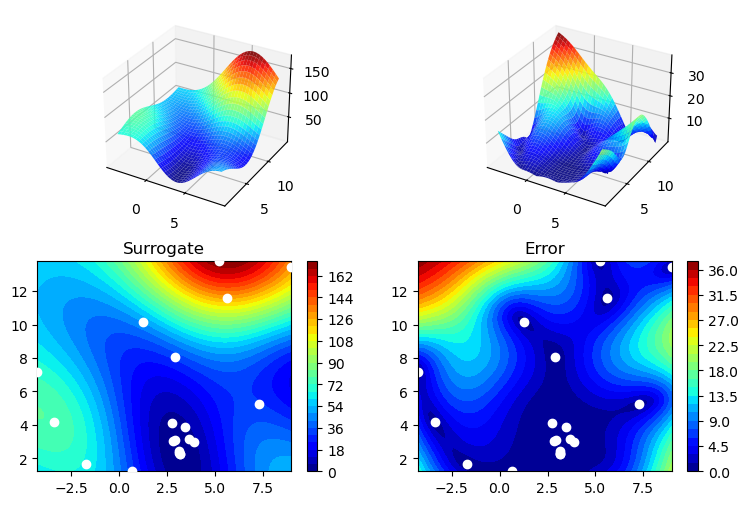

In [17]:
#2-dim Branin function fun_branin using spotPython's internal Kriging
fun = analytical().fun_branin
PREFIX = "BRANIN"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    lower = np.array([-5,-0]),
    upper = np.array([10,15]),
    fun_evals=20,
    max_time=inf)

design_control = design_control_init(
    init_size=10)

spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   design_control=design_control)
spot_2.run()
spot_2.print_results()
spot_2.plot_progress(log_y=True)
spot_2.surrogate.plot()

### 1. A decision tree regressor: `DecisionTreeRegressor`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
* Use the surrogate as the model for optimization.


spotPython tuning: 30.69410528614059 [######----] 55.00% 
spotPython tuning: 30.69410528614059 [######----] 60.00% 
spotPython tuning: 23.864494553469576 [######----] 65.00% 
spotPython tuning: 12.573463667287577 [#######---] 70.00% 
spotPython tuning: 9.541981201358062 [########--] 75.00% 
spotPython tuning: 1.8090034135005286 [########--] 80.00% 
spotPython tuning: 1.7303849957606374 [########--] 85.00% 
spotPython tuning: 1.7303849957606374 [#########-] 90.00% 
spotPython tuning: 1.7303849957606374 [##########] 95.00% 
spotPython tuning: 1.7303849957606374 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': 'BRANIN',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 20,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_na

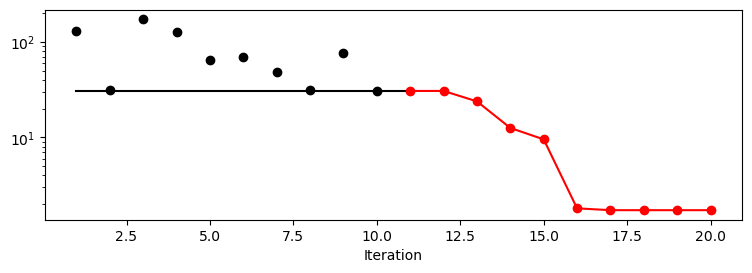

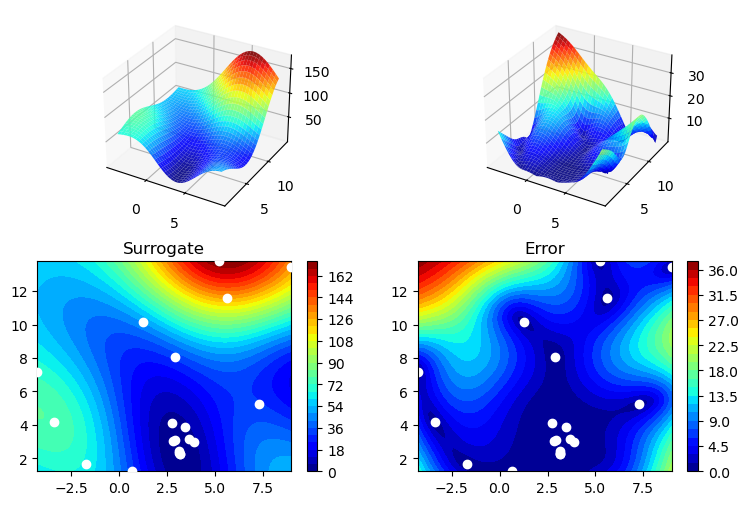

In [22]:
#2-dim Branin function using Sklearn Model DecisionTreeRegressor
spot_2_DTR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_DTR)
spot_2_DTR.run()
spot_2_DTR.print_results()
spot_2_DTR.plot_progress(log_y=True)
spot_2_DTR.plot_model()
spot_2.surrogate.plot()

### 2. A random forest regressor: `RandomForestRegressor`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).
* Use the surrogate as the model for optimization.


spotPython tuning: 5.946800592019464 [######----] 55.00% 
spotPython tuning: 5.946800592019464 [######----] 60.00% 
spotPython tuning: 2.093665266757097 [######----] 65.00% 
spotPython tuning: 2.093665266757097 [#######---] 70.00% 
spotPython tuning: 2.093665266757097 [########--] 75.00% 
spotPython tuning: 2.0264784623082113 [########--] 80.00% 
spotPython tuning: 1.9316864959536755 [########--] 85.00% 
spotPython tuning: 1.9316864959536755 [#########-] 90.00% 
spotPython tuning: 1.9316864959536755 [##########] 95.00% 
spotPython tuning: 1.9316864959536755 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': 'BRANIN',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 20,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set_name

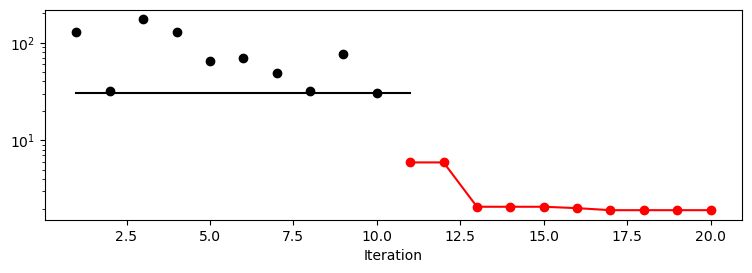

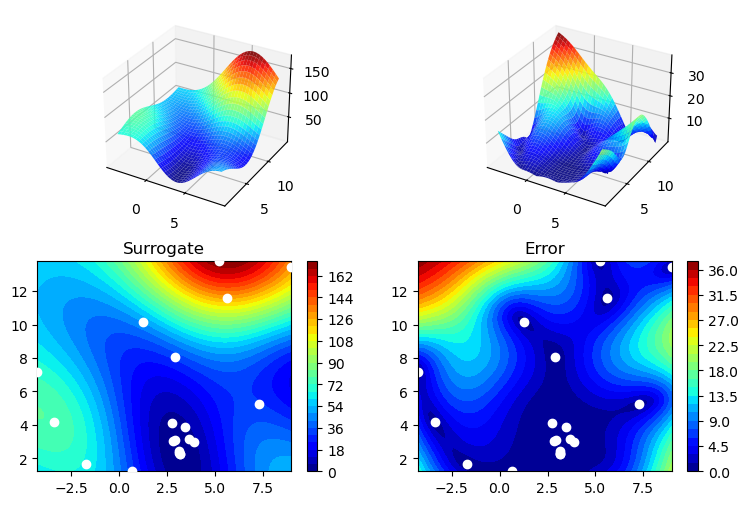

In [23]:
#2-dim Branin function using Sklearn Model RandomForestRegressor
spot_2_RFR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_RFR)
spot_2_RFR.run()
spot_2_RFR.print_results()
spot_2_RFR.plot_progress(log_y=True)
spot_2_RFR.plot_model()
spot_2.surrogate.plot()

### 3. Ordinary least squares Linear Regression: `LinearRegression` 

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
* Use the surrogate as the model for optimization.


spotPython tuning: 10.960827645483478 [######----] 55.00% 
spotPython tuning: 10.960827645483478 [######----] 60.00% 
spotPython tuning: 10.960827645483478 [######----] 65.00% 
spotPython tuning: 10.960827645483478 [#######---] 70.00% 
spotPython tuning: 1.3263745845108854 [########--] 75.00% 
spotPython tuning: 1.3263745845108854 [########--] 80.00% 
spotPython tuning: 1.3263745845108854 [########--] 85.00% 
spotPython tuning: 1.3263745845108854 [#########-] 90.00% 
spotPython tuning: 1.3263745845108854 [##########] 95.00% 
spotPython tuning: 1.3263745845108854 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': 'BRANIN',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 20,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set

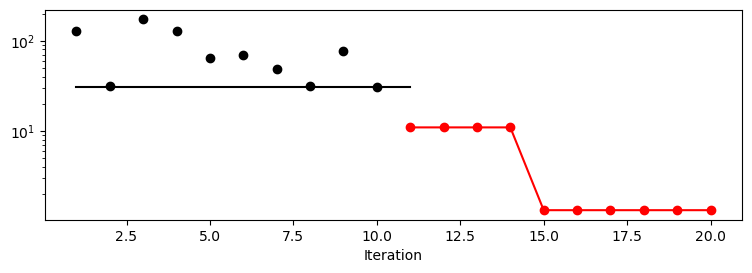

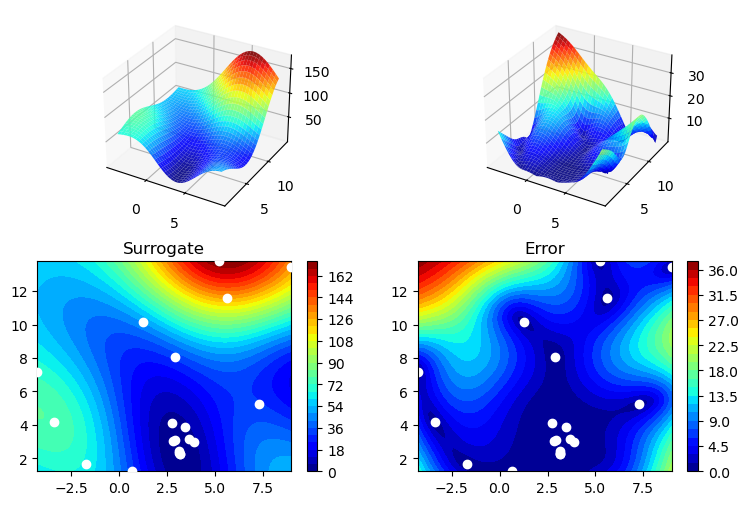

In [24]:
#2-dim Branin function using Sklearn Model LinearRegression
spot_2_LR = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_LR)
spot_2_LR.run()
spot_2_LR.print_results()
spot_2_LR.plot_progress(log_y=True)
spot_2_LR.plot_model()
spot_2.surrogate.plot()

### 4. Linear least squares with l2 regularization: `Ridge`

* Describe the surrogate model. Use the information from the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).
* Use the surrogate as the model for optimization.


spotPython tuning: 10.960827645483478 [######----] 55.00% 
spotPython tuning: 10.960827645483478 [######----] 60.00% 
spotPython tuning: 10.960827645483478 [######----] 65.00% 
spotPython tuning: 10.960827645483478 [#######---] 70.00% 
spotPython tuning: 1.3263745845108854 [########--] 75.00% 
spotPython tuning: 1.3263745845108854 [########--] 80.00% 
spotPython tuning: 1.3263745845108854 [########--] 85.00% 
spotPython tuning: 1.3263745845108854 [#########-] 90.00% 
spotPython tuning: 1.3263745845108854 [##########] 95.00% 
spotPython tuning: 1.3263745845108854 [##########] 100.00% Done...

{'CHECKPOINT_PATH': 'runs/saved_models/',
 'DATASET_PATH': 'data/',
 'PREFIX': 'BRANIN',
 'RESULTS_PATH': 'results/',
 'TENSORBOARD_PATH': 'runs/',
 '_L_in': None,
 '_L_out': None,
 '_torchmetric': None,
 'accelerator': 'auto',
 'converters': None,
 'core_model': None,
 'core_model_name': None,
 'counter': 20,
 'data': None,
 'data_dir': './data',
 'data_module': None,
 'data_set': None,
 'data_set

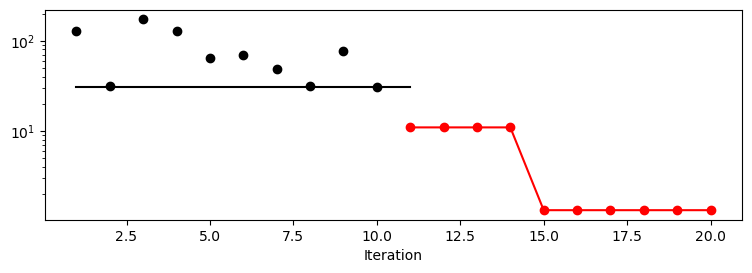

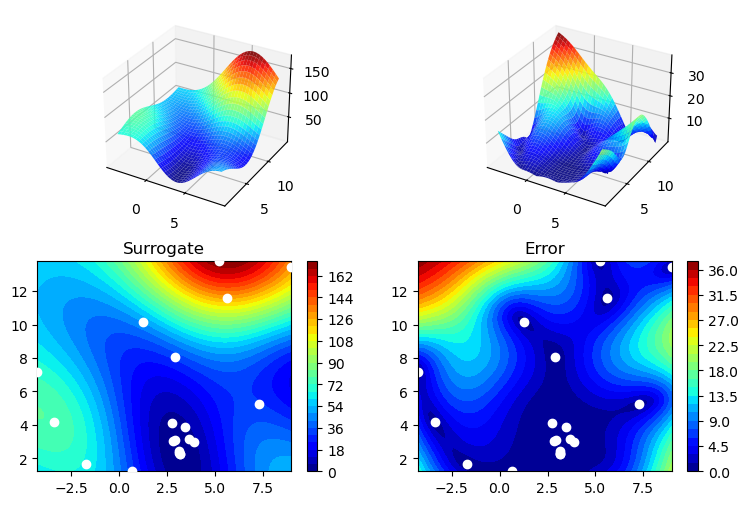

In [25]:
#2-dim Branin function using Sklearn Model Ridge
spot_2_R = spot.Spot(fun=fun,
                      fun_control=fun_control,
                      design_control=design_control,
                      surrogate = S_R)
spot_2_R.run()
spot_2_R.print_results()
spot_2_R.plot_progress(log_y=True)
spot_2_R.plot_model()
spot_2.surrogate.plot()

### 5. Comparison of Surrogates

* Use the following two objective functions

  1. the 1-dim sphere function [`fun_sphere`](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py) and
  2. the two-dim Branin function [`fun_branin`](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotPython/fun/objectivefunctions.py):
    
    for a comparison of the performance of the five different surrogates: 
    * `spotPython`'s internal Kriging
    * `DecisionTreeRegressor`
    * `RandomForestRegressor`
    * `linear_model.LinearRegression`
    * `linear_model.Ridge`.

* Generate a table with the results (number of function evaluations, best function value, and best parameter vector) for each surrogate and each function as shown in @tbl-results.

| `surrogate` | `fun` | `fun_evals` | `max_time` | `x_0` | `x_1` |`min_y` | Comments | Run-Time (sec)|
|-------------|-------|-------------:|------------|------------------:|---------:|----------|---------|----------|
| `Kriging`     | `fun_sphere` | 10         | `inf`         |   0.003770156       |   N.A    |  1.4214077e-05        |  This Gives the best Result as compared to others | 3.47| 
| `Kriging`     | `fun_branin` | 10         | `inf`          |      3.1549178    |  2.285942382    |  0.399193986   |   This Gives the best Result as compared to others  | 5.85|
| `DecisionTreeRegressor`     | `fun_sphere` | 10         | `inf`          |  -0.026685 |   N.A   |  0.00071211 | This has also given a value close to the Kriging's    |     2.91|
| `DecisionTreeRegressor`     | `fun_branin` | 10         | `inf`    |   3.479820933 | 0.99522069 | 2.0044269  |  This the 2nd most close result achevied from all.   | 3.87|
| `RandomForestRegressor`     | `fun_sphere` | 10         | `inf`  | -0.000737464  | N.A  | 5.4385305   | The min value of objective function is the highest among all.|  6.99|
| `RandomForestRegressor`     | `fun_branin` | 10         | `inf`|  3.018658 |   5.8497191   | 12.5591537|   The min value of objective function is the highest among all.  | 28.13|
| `LinearRegression`  | `fun_sphere` | 10 | `inf` |  0.093439208  | N.A     | 0.008730886  |  This is same as Ridge which is moderately close to the best.    | 2.84|
| `LinearRegression` | `fun_branin` | 10   | `inf`  |  -2.87273077   | 10.8743138     |    1.3263745      |  This is same as Ridge which is moderately close to the best.  | 5.05|
| `Ridge`     | `fun_sphere` | 10  | `inf`|  0.94339208  | N.A | 0.008730886         |  This is same as Linear Regression which is moderately close to the best.     | 2.61|
| `Ridge`     | `fun_branin` | 10 | `inf` |  -2.8727307  | 10.87431383 | 1.326374    |   This is same as Linear Regression which is moderately close to the best.      | 5.30|





### Conclusion
The table compares the performance of different surrogate models, specifically Kriging, Decision Tree Regressor, Random Forest Regressor, Linear Regression, and Ridge Regression. The models are evaluated on two objective functions, fun_sphere and fun_branin. The evaluation considers the number of function evaluations, the best function value, and the best parameter vector.

Here are some general observations from the table:

Kriging appears to be the most performant model overall. It achieves the best function value for both fun_sphere and fun_branin with a moderate number of function evaluations.
Decision Tree Regressor and Random Forest Regressor achieve similar performance. They find close-to-optimal solutions for both functions but require more function evaluations than Kriging.
Linear Regression and Ridge Regression show similar performance. They perform moderately well but do not reach the optimal value for either function.
Overall, the choice of surrogate model depends on the specific needs of the application. If finding the absolute best solution is critical, Kriging might be the best choice despite its higher computational cost. If computational efficiency is a priority, then Decision Tree Regressor or Random Forest Regressor could be reasonable alternatives, even if they might not reach the absolute optimal value. Linear Regression and Ridge Regression might be suitable for applications where a moderately good solution is sufficient.